In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:95% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font color="red" size="5">ch.12 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib(데이터 시각화), seaborn(데이터 시각화), folium(지도시각화)
    * matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리, 판다스 내부에 포함되어있음.
    * seaborn : matplotlib기반으로 다양한 색, 테마, 차트 기능과 groupby 기능 포함된 라이브러리
    
# 2절. seaborn
- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
- 공식사이트 : https://seaborn.pydata.org
- seaborn API : https://seaborn.pydata.org/api.html
- Seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
    1) 데이터 준비
    2) 미적속성 설정(버전에 따라 차이가 있으나 한글설정을 다시 해야함.)
    3) 함수를 이용하여 그래프 그리기(수치형, 범주형, 쌍관계, 밀도, 회귀, 다중그래프)
    4) 그래프 출력(show), 저장(savefig)

In [3]:
# 시각화가 필요한 경우 복사/붙혀넣기 할것
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 해상도를 높여줌
%config InlineBackend.figure_format = 'retina'

# 한글설정
plt.rc('font', family='Malgun Gothic') #윈도우인 경우
# plt.rc(''font', family='AppleGothic') #mac환경인 경우
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) #축의 - 깨짐 방지

# warning(경고창)을 안보이게 하는 법

In [4]:
sns.__version__

'0.12.2'

## 2.1 데이터 준비하기
- iris, titanic

In [6]:
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [12]:
iris.species.unique() # 범주형 데이터들의 종류

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
iris['species'].value_counts() # 범주별 데이터 갯수
iris.groupby('species')['sepal_length'].count()

species
setosa        50
versicolor    50
virginica     50
Name: sepal_length, dtype: int64

In [15]:
titanic=sns.load_dataset('titanic')
#Survived - 생존유무, target 값. (0 = 사망, 1 = 생존)
#Name - 탑승객 성명
#Pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
#Sex - 성별
#Age - 나이(세)
#SibSp - 함께 탑승한 형제자매, 배우자 수 총합
#Parch - 함께 탑승한 부모, 자녀 수 총합
#Embarked - 탑승 항구
#Fare - 탑승 요금
#Ticket - 티켓 넘버
#Cabin - 객실 넘버

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [16]:
titanic.shape

(891, 15)

In [19]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [18]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 2.2 미적속성 설정하기(style, context, palette, figsize..)
### 1) 그래프 style 설정
- https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style (교안 51page)

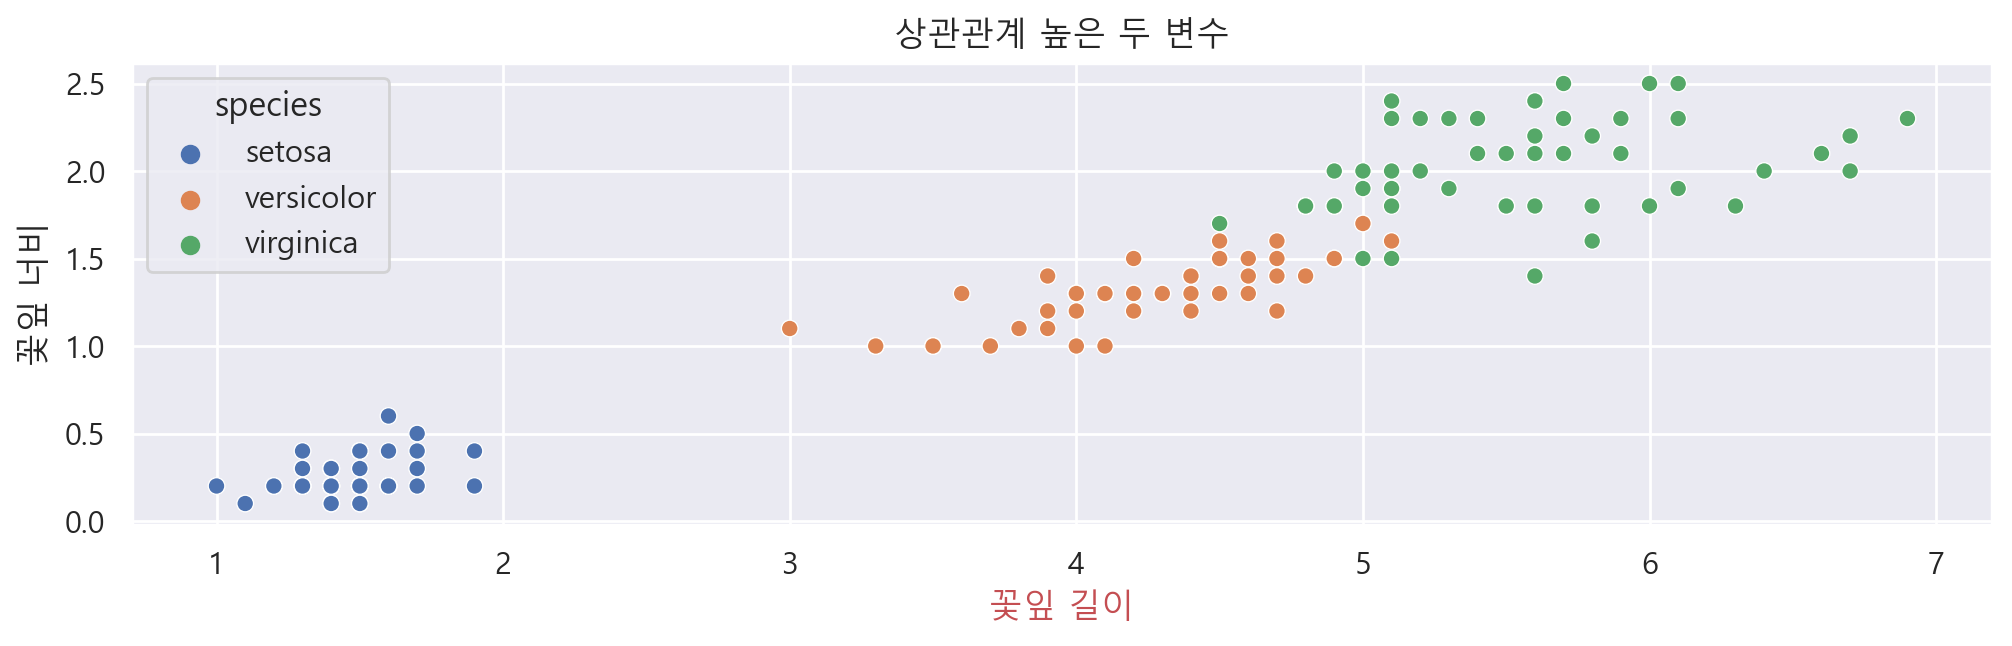

In [26]:
plt.figure(figsize=(12,3))
sns.set(style='darkgrid') # white, whitegrid, darkgrid, ticks
plt.rc('font', family='Malgun Gothic') #윈도우인 경우 #plt함수를 쓰고나면 한글이 초기화 되므로 다시 적용해야함.
plt.rc('axes', unicode_minus=False) #축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
sns.
ax.set(title='상관관계 높은 두 변수',
       ylabel='꽃잎 너비')
ax.set_xlabel('꽃잎 길이', color='r')
plt.show()

### 2) 컨텍스트 지정(비율)

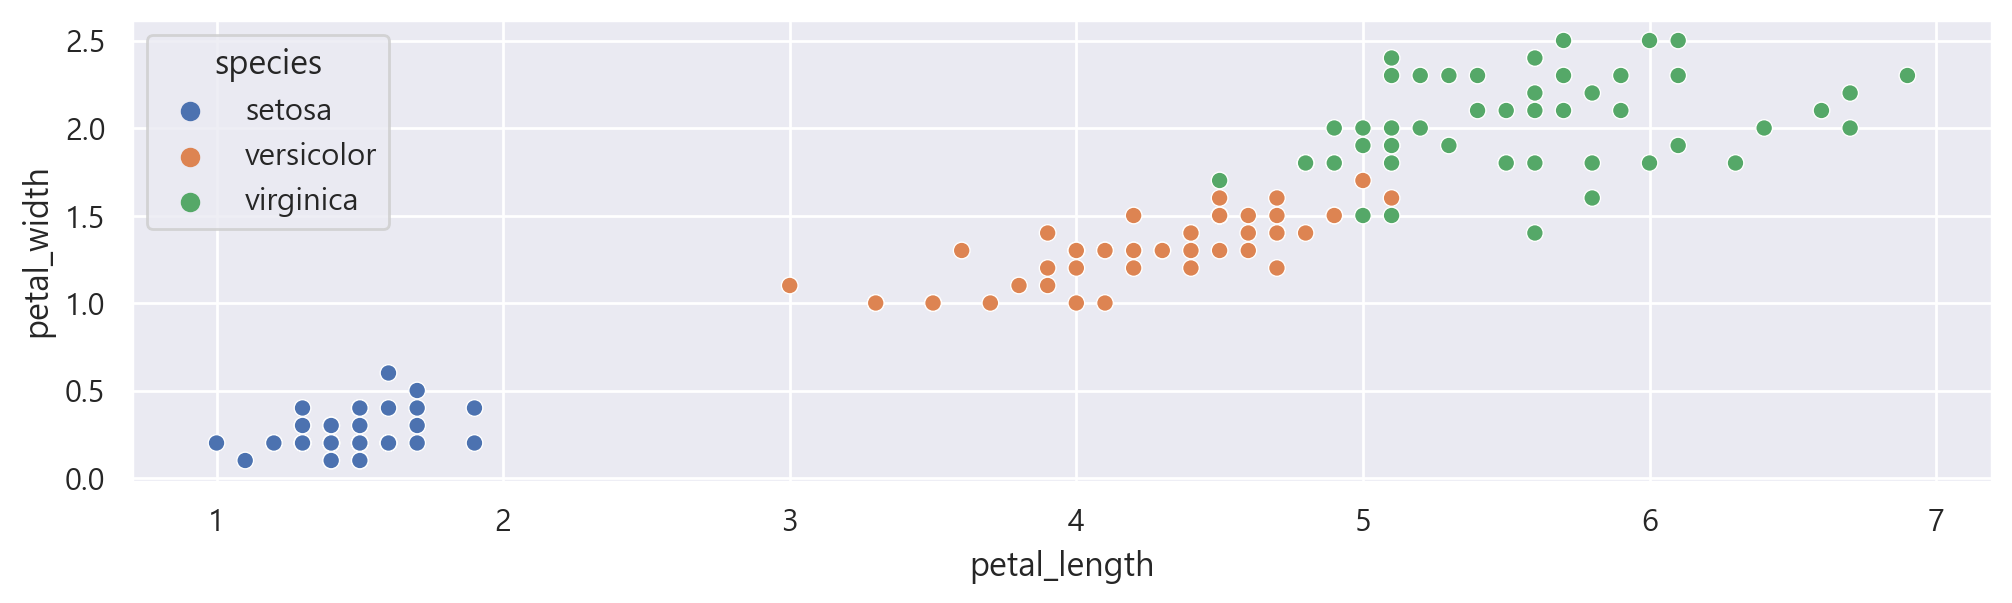

In [27]:
plt.figure(figsize=(12,3))
sns.set(context='notebook') # notebook(1.0), paper(0.8), talk
sns.set_context('notebook')
plt.rc('font', family='Malgun Gothic') #윈도우인 경우 #plt함수를 쓰고나면 한글이 초기화 되므로 다시 적용해야함.
plt.rc('axes', unicode_minus=False) #축의 - 깨짐 방지

ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species')
plt.show()

### 3) 컬러 팔레트 
- https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
- https://matplotlib.org/tutorials/colors/colormaps.html
- https://seaborn.pydata.org/tutorial/color_palettes.html

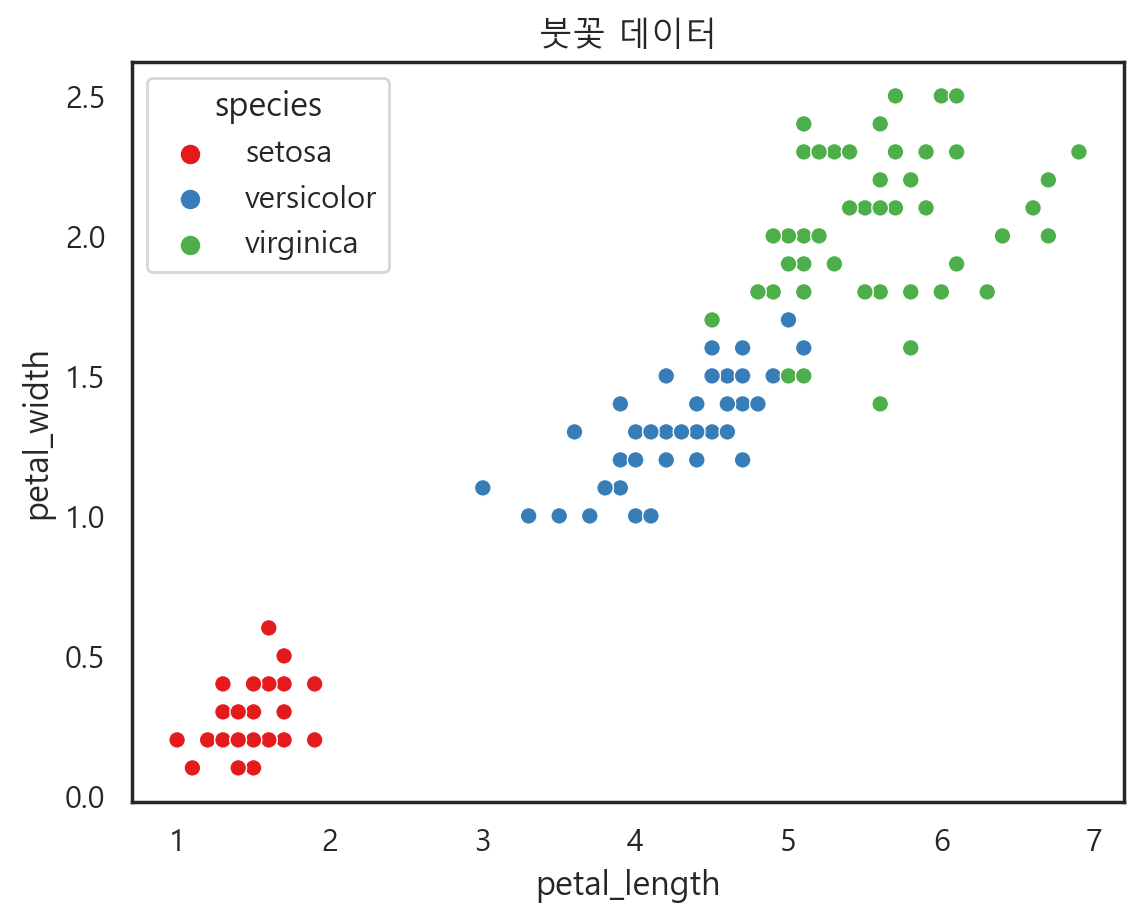

In [30]:
sns.set(palette='Pastel1', style='white', context='notebook') # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False) 
ax = sns.scatterplot(data=iris, x='petal_length', y='petal_width',
               hue='species', palette='Set1')
ax.set_title('붓꽃 데이터')
plt.show()

In [31]:
sns.set(palette='Dark2', 
        style='whitegrid', 
        context='notebook',
        rc={'figure.figsize':(10,3)}) # 기본 미적 속성설정
plt.rc('font', family='Malgun Gothic') 
plt.rc('axes', unicode_minus=False) 

## 2.3 Seaborn 함수로 그래프 그리기
### 1) 관계형 그래프
    - x축이 수치형 데이터
    (ex) scatterplot, lineplot => relplot(서브플롯)

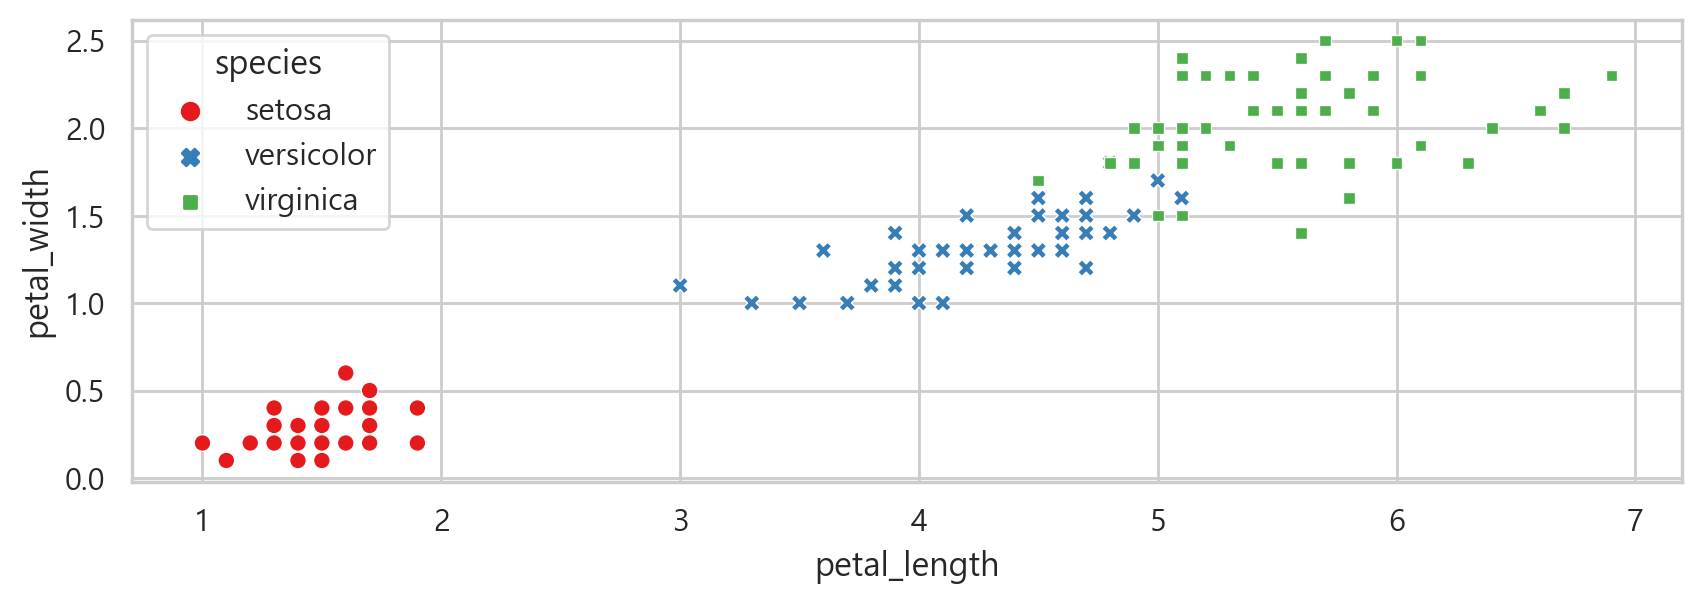

In [35]:
# sns.scatterplot(data=None, x=None, y=None, hue=None, style=None, size=None, palette=None, markers=True)

# data	데이터프레임 (예: iris, df 등)
# x	x축에 사용할 열 이름
# y	y축에 사용할 열 이름
# hue	그룹별 색상 구분 기준 (범주형 변수)
# style	그룹별 마커 모양 구분 기준
# size	그룹별 점 크기 구분 기준
# palette	색상 조합 설정 (예: 'Set1', 'deep', 'pastel')
# markers	마커 사용 여부 및 모양 (기본값: True)
# alpha	투명도 (0.0~1.0)

sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species',
               palette='Set1', style='species')
        # species 별 색상과 스타일이 다른 scatter
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

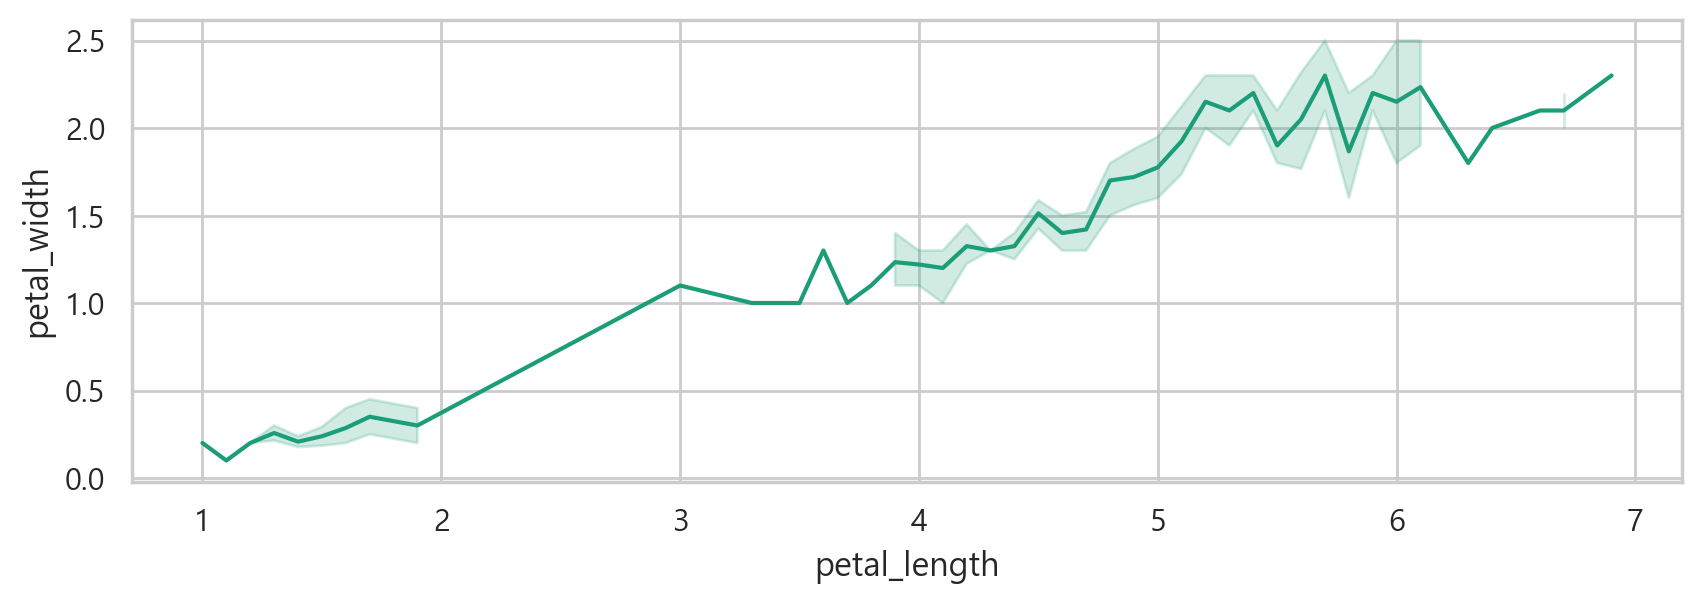

In [36]:
# sns.lineplot(data=None, x=None, y=None, hue=None, style=None, size=None, markers=None, dashes=True, palette=None)

# data	데이터프레임 또는 배열형 자료
# x	x축 데이터 (열 이름 또는 배열)
# y	y축 데이터 (열 이름 또는 배열)
# hue	색상 구분 기준 (범주형 변수)
# style	선 스타일 (실선, 점선 등) 구분 기준
# size	선 두께 구분 기준
# markers	각 점에 마커 표시 여부 (기본값: None)
# dashes	선을 점선 등으로 표시할지 여부 (True/False)
# palette	색상 팔레트 지정 ('deep', 'muted', 'Set1' 등)

sns.lineplot(data=iris, x='petal_length', y='petal_width')

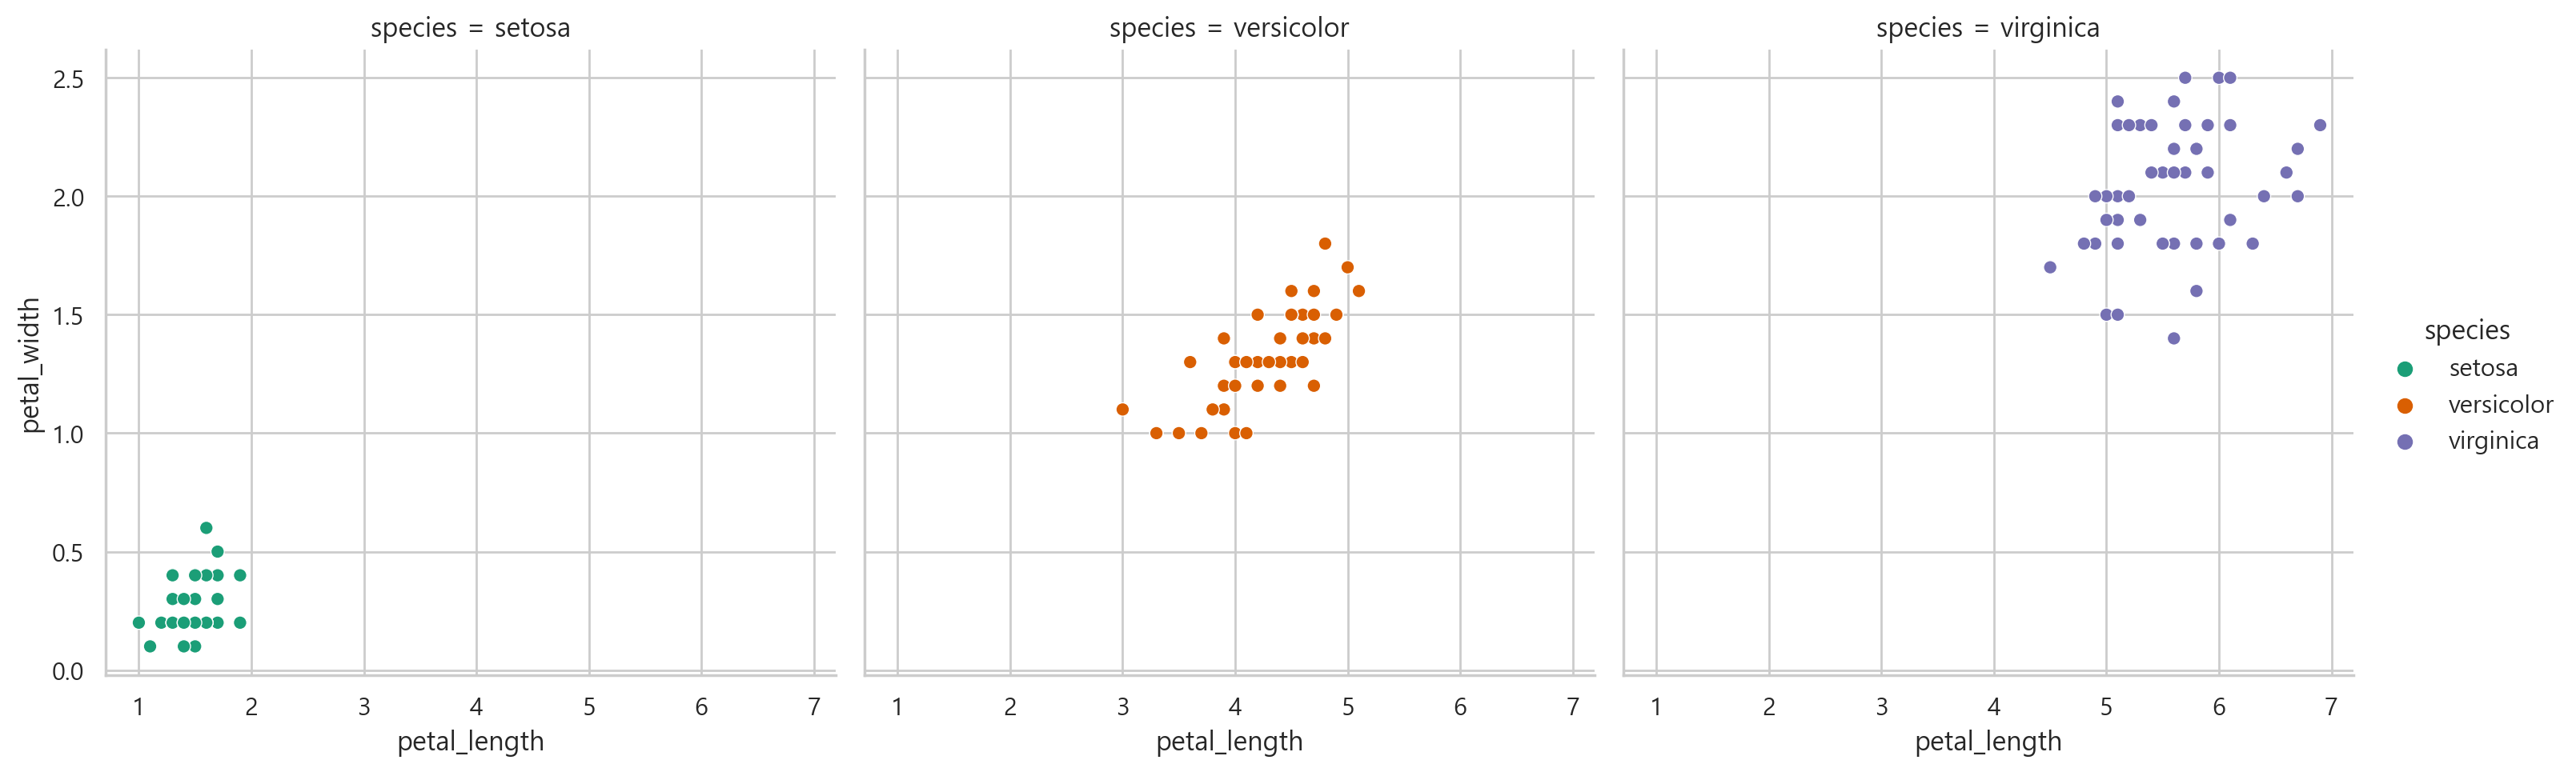

In [38]:
# 종별 lineplot을 서브플롯으로
sns.relplot(data=iris, x='petal_length', y='petal_width', 
            hue='species',
            #kind='line', #kind='scatter',  #kind에는 'line'과 'scatter'밖에 올수없다.
            col='species', #species별 서브플롯
           )

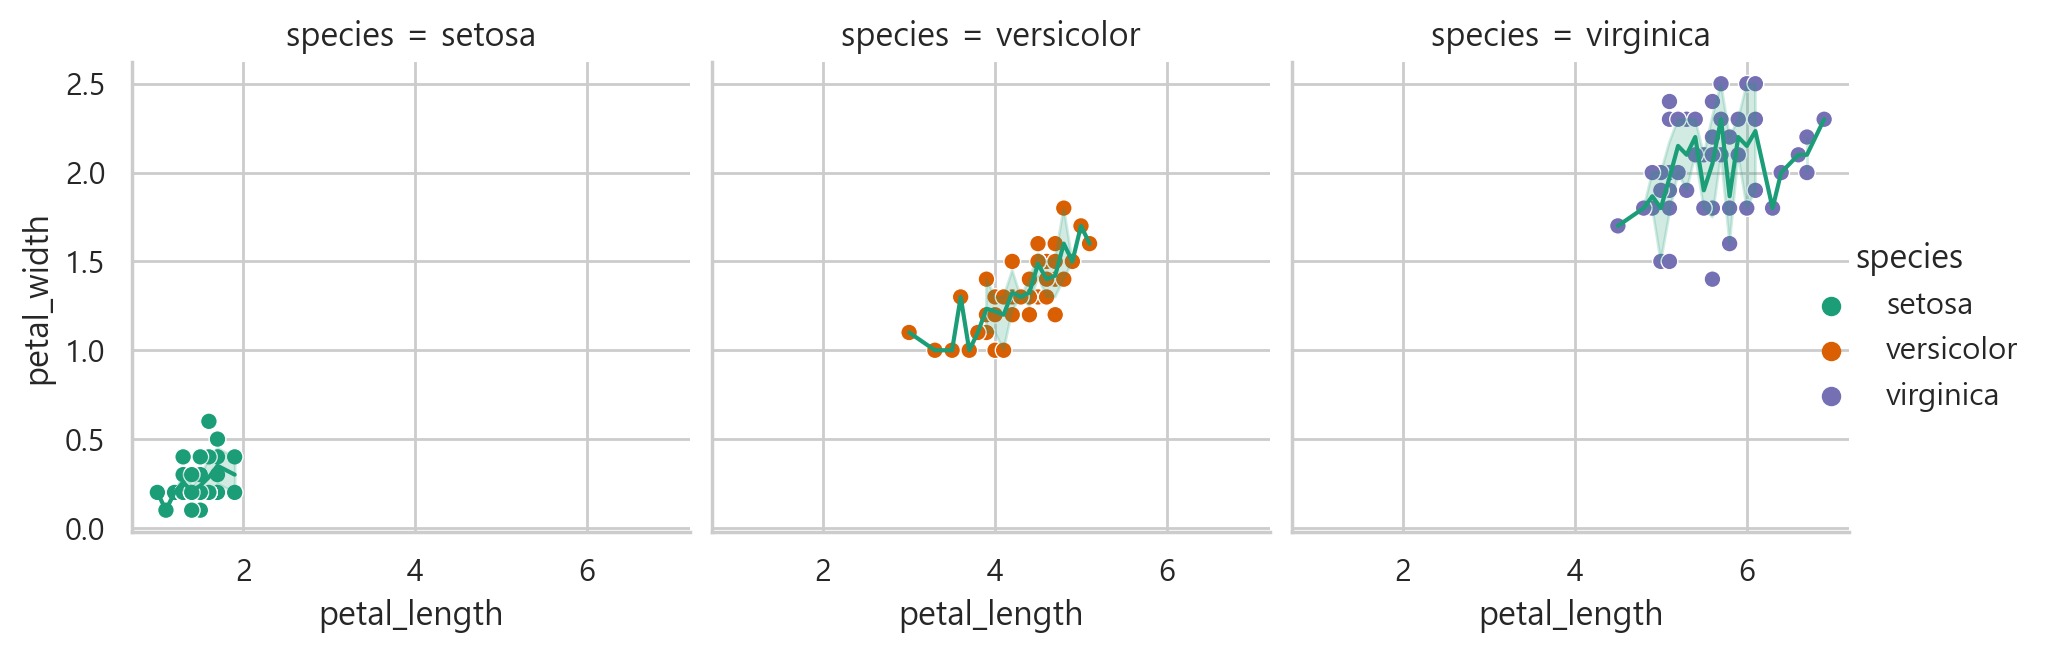

In [41]:
#line과 scatter를 종별 서브플롯으로 겹쳐서
g = sns.relplot(data=iris, x='petal_length', y='petal_width', 
            hue='species',
            col='species', #species별 서브플롯
           )
# g그래프에 line플롯을 추가
g.map_dataframe(sns.lineplot, x='petal_length', y='petal_width')
# 크기조정: 서브플롯함수에서는 내부적으로 figure 새로 만들기 때문에 figsize 무시
g.fig.set_size_inches(10,3)

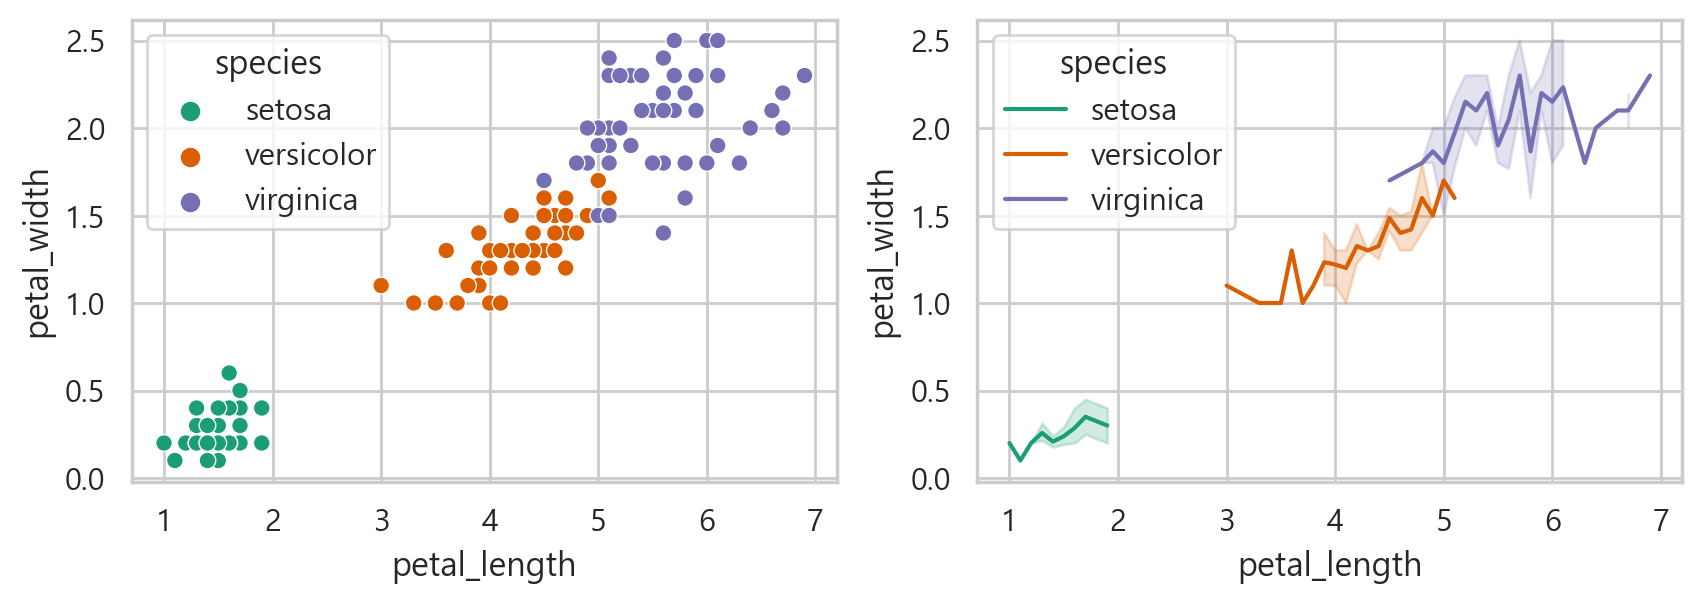

In [43]:
# ax[0]에는 scatter, ax[1] lineplot
fig, ax = plt.subplots(1, ncols=2)
sns.scatterplot(data=iris,
               x='petal_length', 
               y='petal_width',
               hue='species',
               ax=ax[0])
sns.lineplot(data=iris,
            x='petal_length', 
            y='petal_width',
            hue='species',
            ax=ax[1])
plt.show()

### 2) 범주형 그래프
    - x축이 범주형 데이터
    (ex) stripplot(무작위 흩뿌림), swarmplot(겹치지 않는 산점도)
        barplot(x의 평균으로 막대그래프), barhplot(y의 평균으로 막대그래프)
        pointplot(y의 평균으로 line을 그림), countplot(x의 빈도수가 높이),
        boxplot, violinplot, boxenplot
        => catplot(서브플롯)

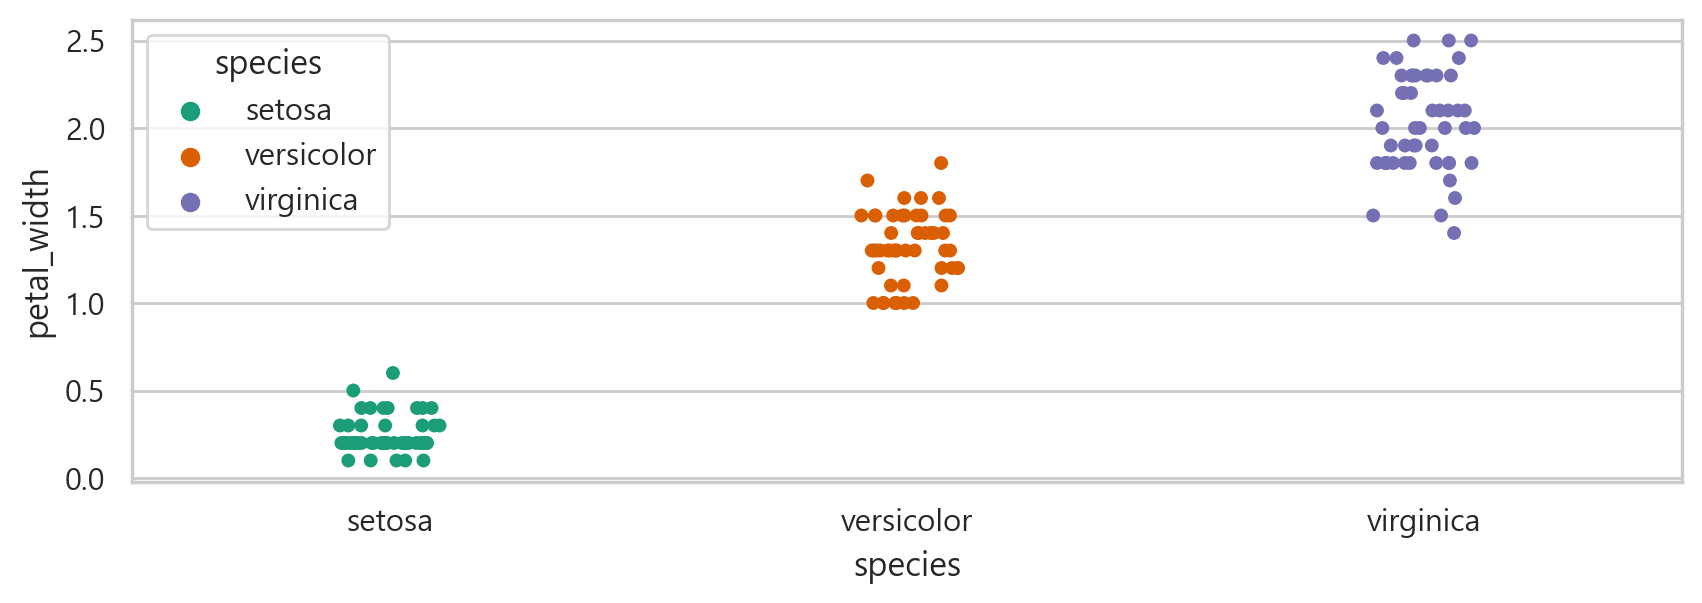

In [45]:
# x축이 범주형일 때의 산점도
sns.stripplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

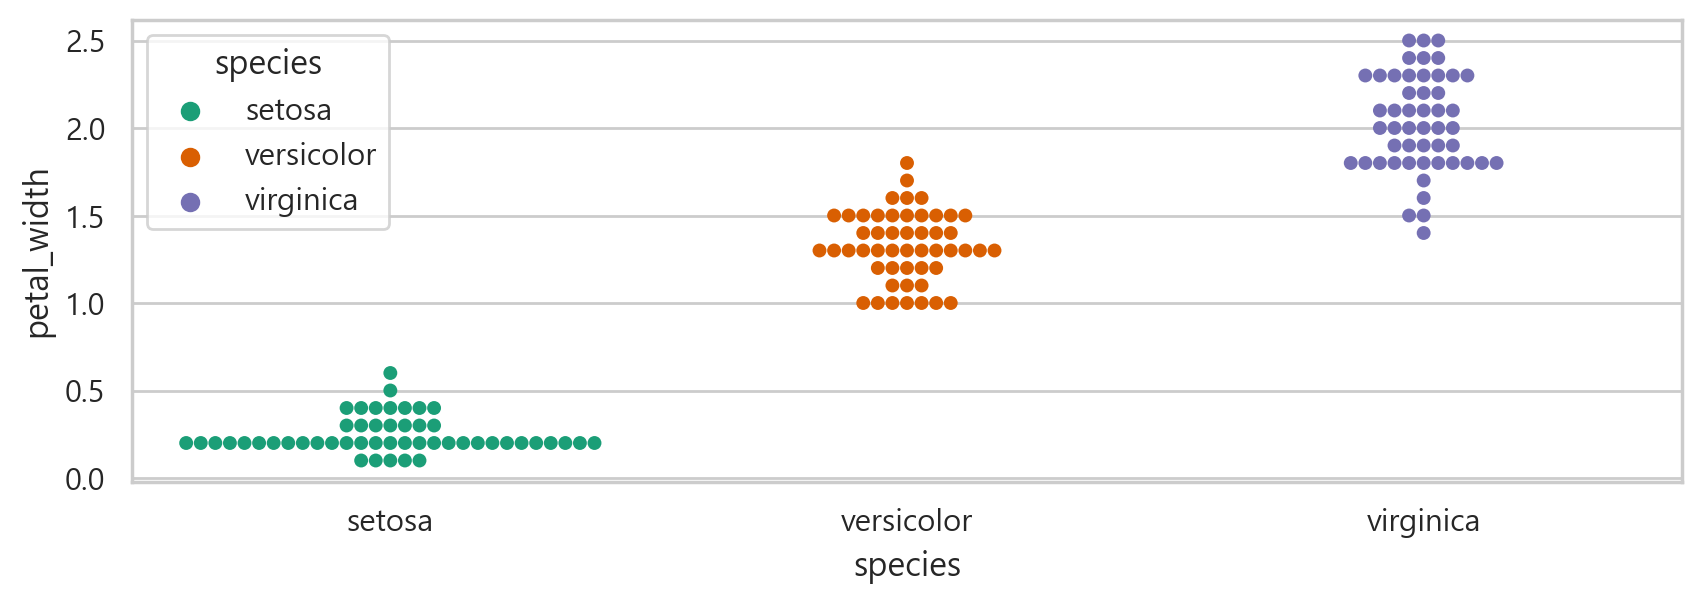

In [46]:
# x축이 범주형일 때의 산점도(분포 포함)
sns.swarmplot(data=iris, x='species', y='petal_width', hue='species')
plt.show()

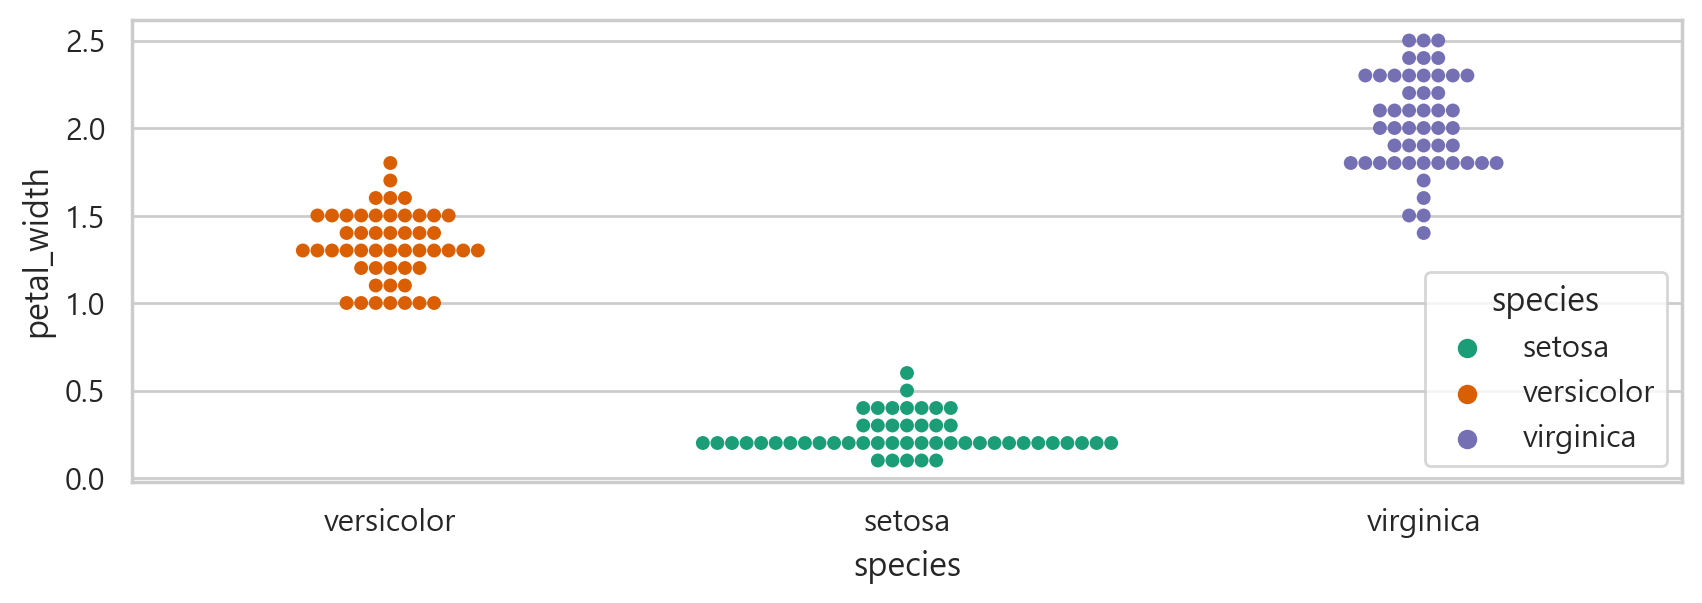

In [49]:
# 범주형 그래프의 x축을 지정하지 않으면
sns.swarmplot(data=iris, 
             x='species', 
             y='petal_width', 
             hue='species',
             order=['versicolor','setosa','virginica'])
plt.show()

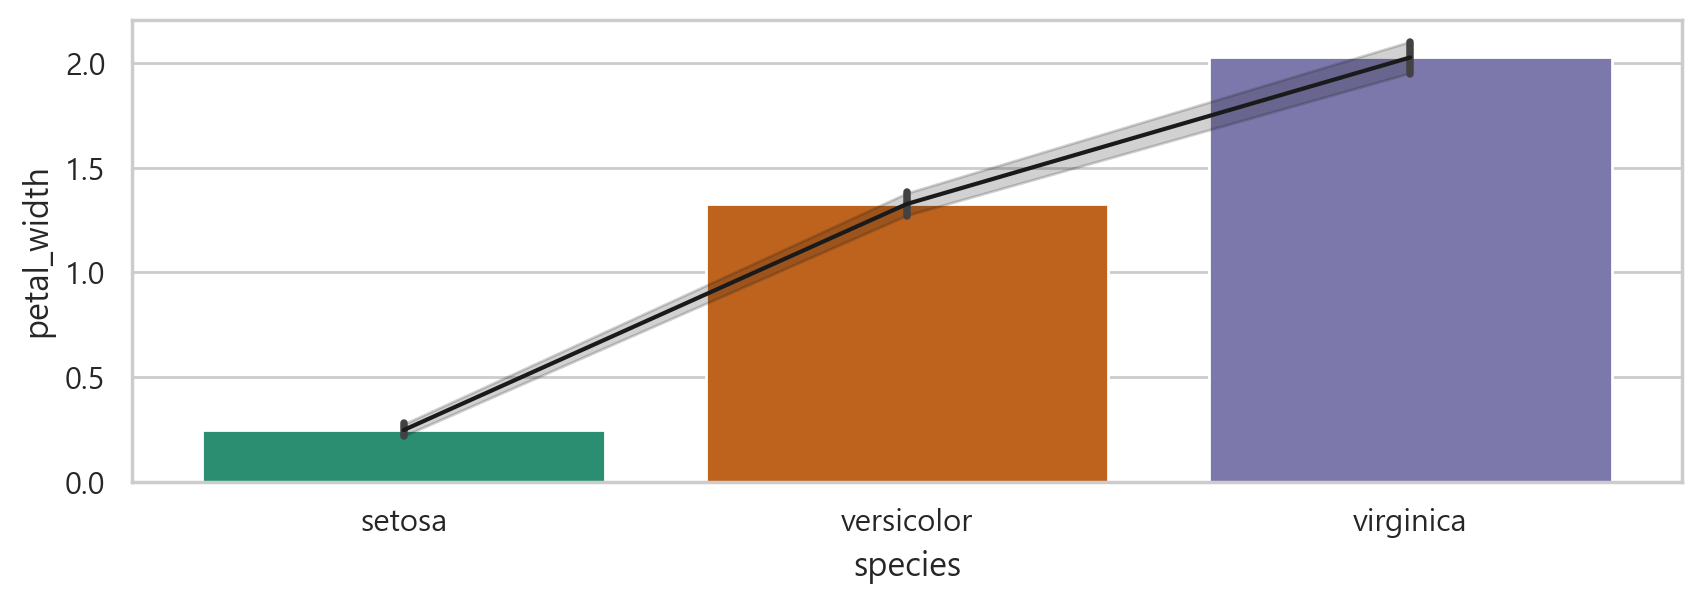

In [59]:
# barplot, barhplot, pointplot : 각 범주별 평균값(y)과 그에 대한 신뢰구간
            # 신뢰구간 제외 : errorbar=None
sns.barplot(data=iris, x='species', y='petal_width',
            #errorbar=None
           )
sns.lineplot(data=iris, x='species', y='petal_width', color='k')
plt.show()

<Axes: xlabel='species', ylabel='petal_width'>

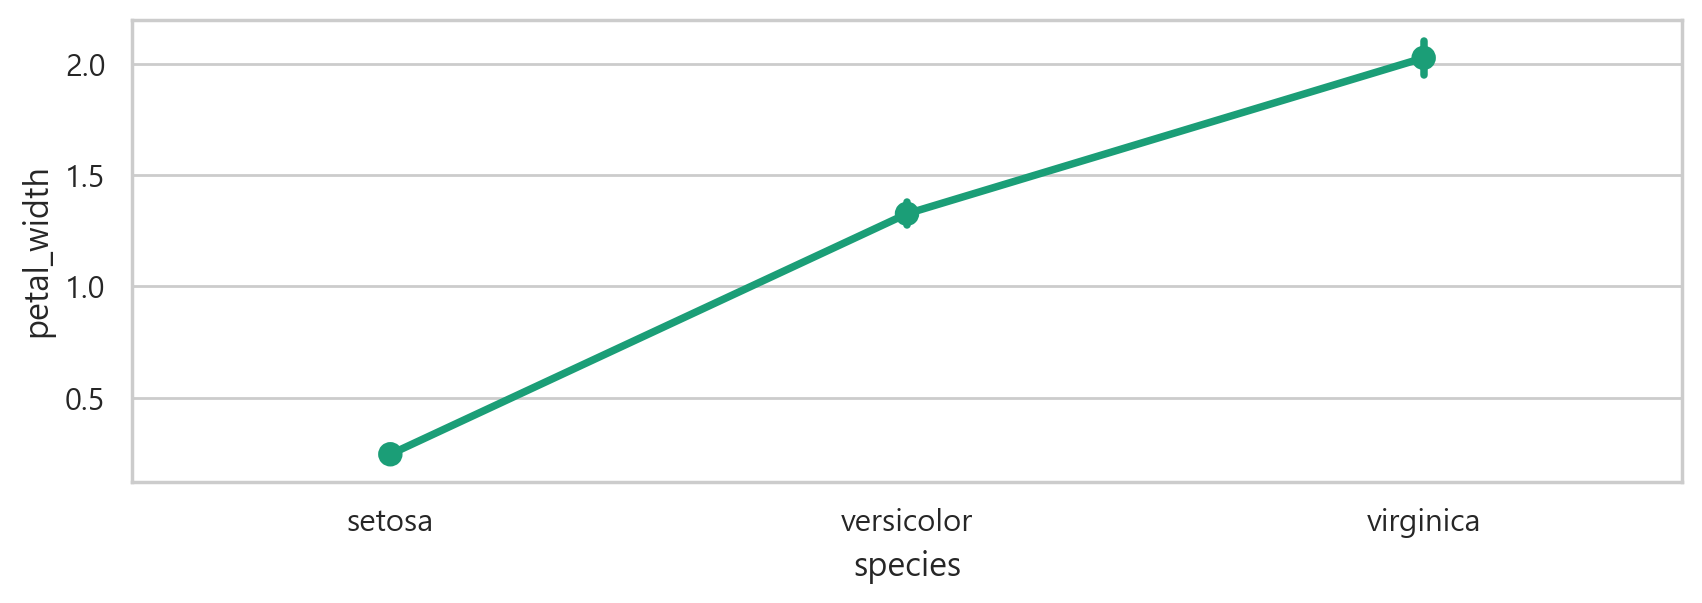

In [60]:
sns.pointplot(data=iris, x='species', y='petal_width') # 신뢰구간을 제외

In [61]:
# 타이타닉 데이터를 토대로 성별 생존률을 막대그래프
titanic.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [62]:
titanic.dtypes.head(3)

survived     int64
pclass       int64
sex         object
dtype: object

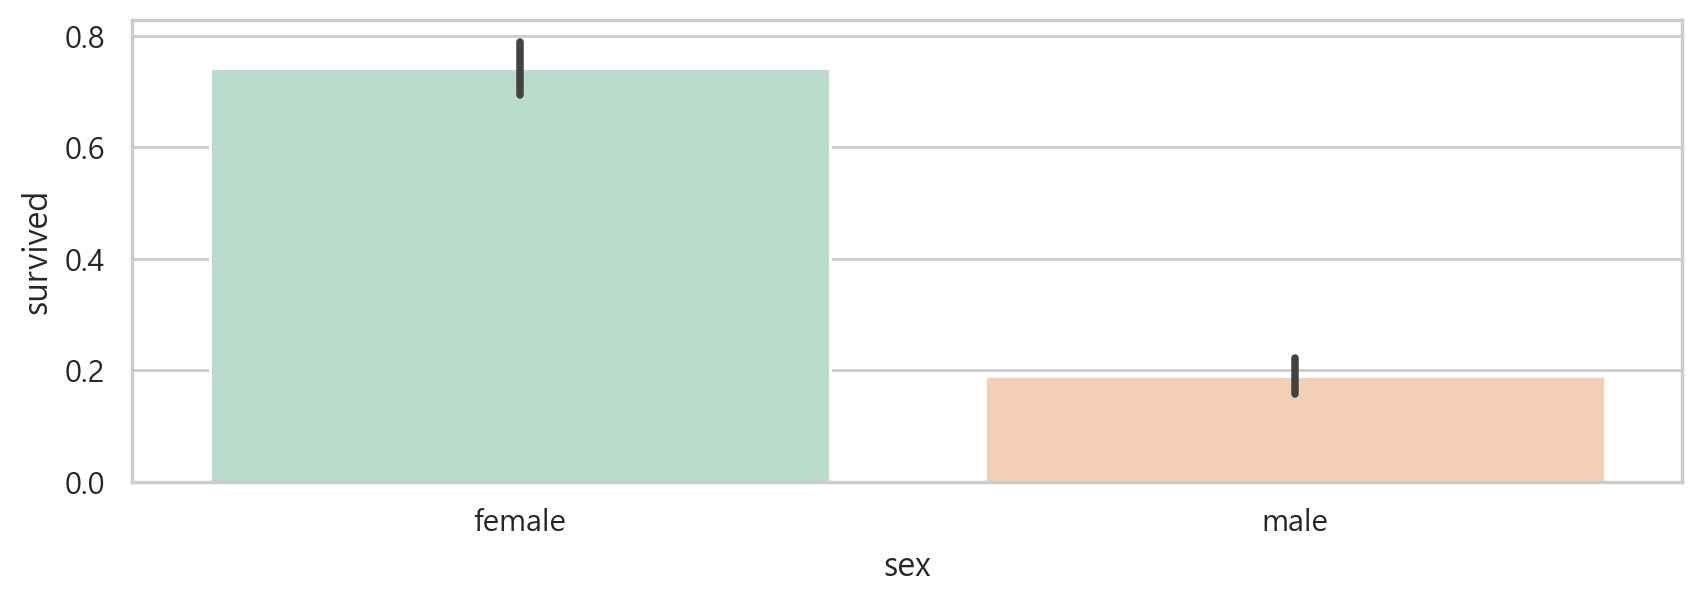

In [65]:
#성별 생존율 막대그래프
sns.barplot(data=titanic,
           x='sex',
           y='survived',
           order=['female','male'],
           palette='Pastel2')
plt.show()

In [66]:
titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

In [67]:
#남자(577) 중 사망자
len(titanic[(titanic.sex=='male') & (titanic.survived==0)])

468

In [68]:
#남자(577) 중 생존자
len(titanic[(titanic.sex=='male') & (titanic.survived==1)])

109

In [69]:
#여자(314) 중 사망자
len(titanic[(titanic.sex=='female') & (titanic.survived==0)])

81

In [70]:
#여자(314) 중 생존자
len(titanic[(titanic.sex=='female') & (titanic.survived==1)])

233

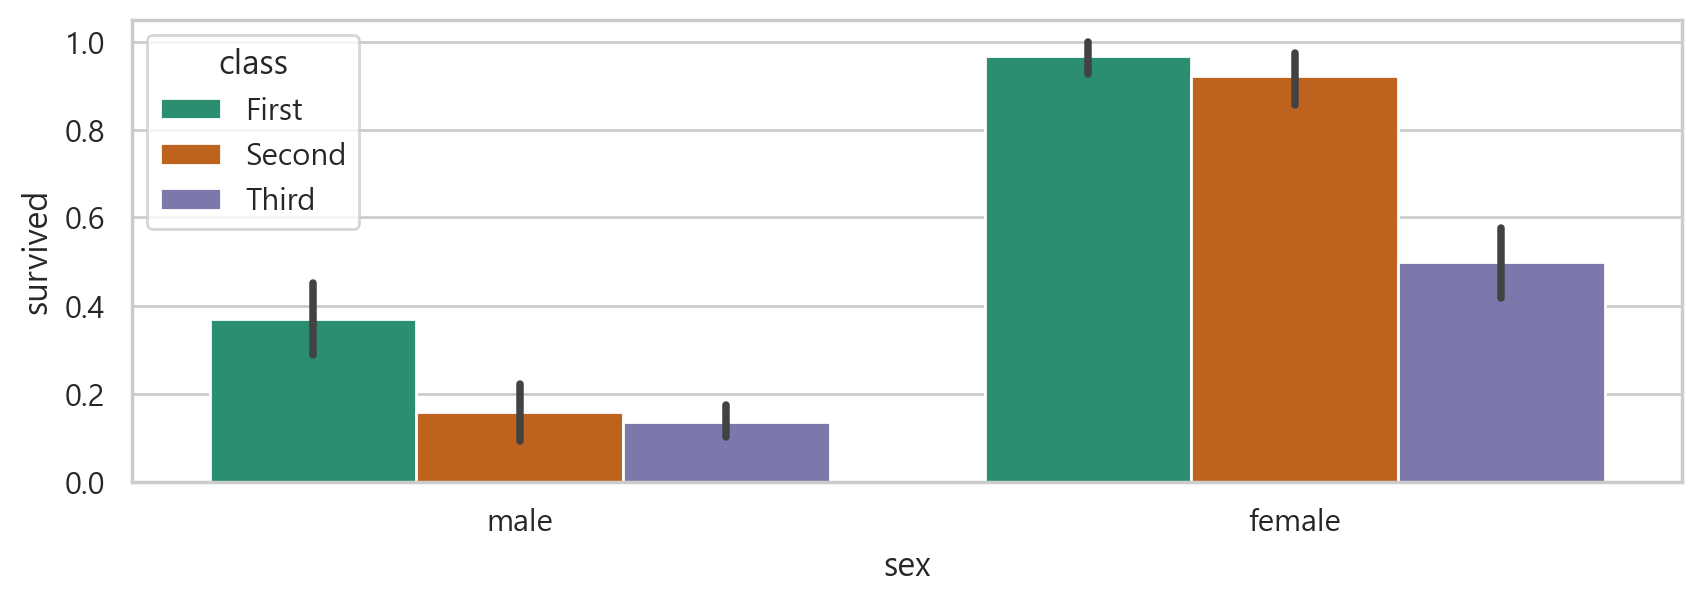

In [71]:
# 성별 생존율 hue='class'
sns.barplot(data=titanic, x='sex', y='survived', hue='class')
plt.show()

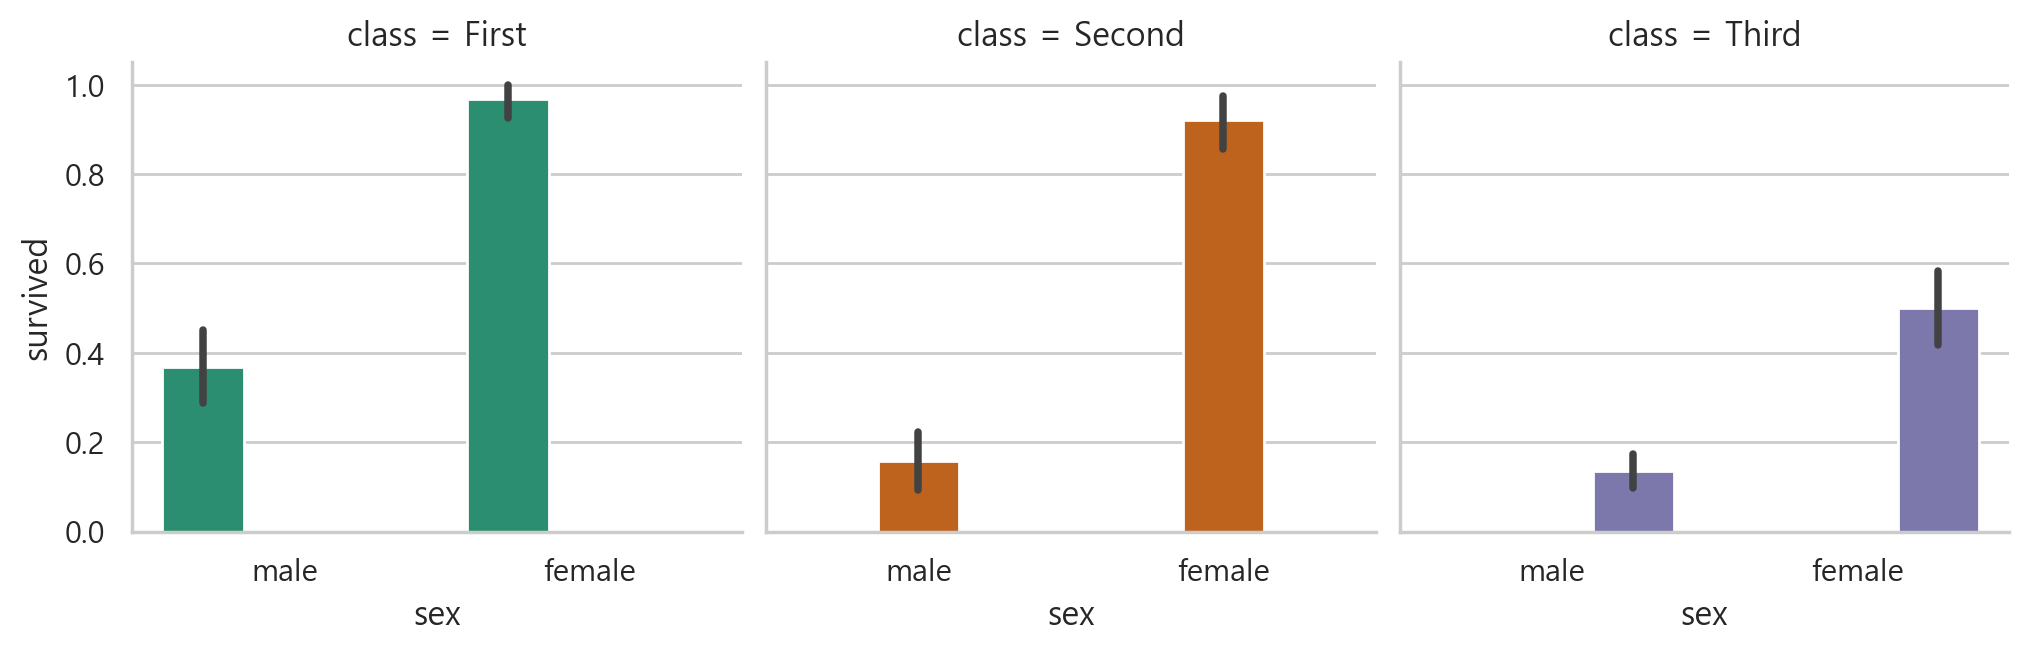

In [76]:
# class 별로 성별생존률을 서브플롯(막대그래프)
g = sns.catplot(data=titanic,
           x='sex',
           y='survived',
           hue='class',
           kind='bar', # 기본값은 stripplot
           col='class',
           #col_wrap=2, # 한행에 그려질 서브플롯 갯수(기본값 1), 기본값은 n개
           )
g.fig.set_size_inches(10,3)

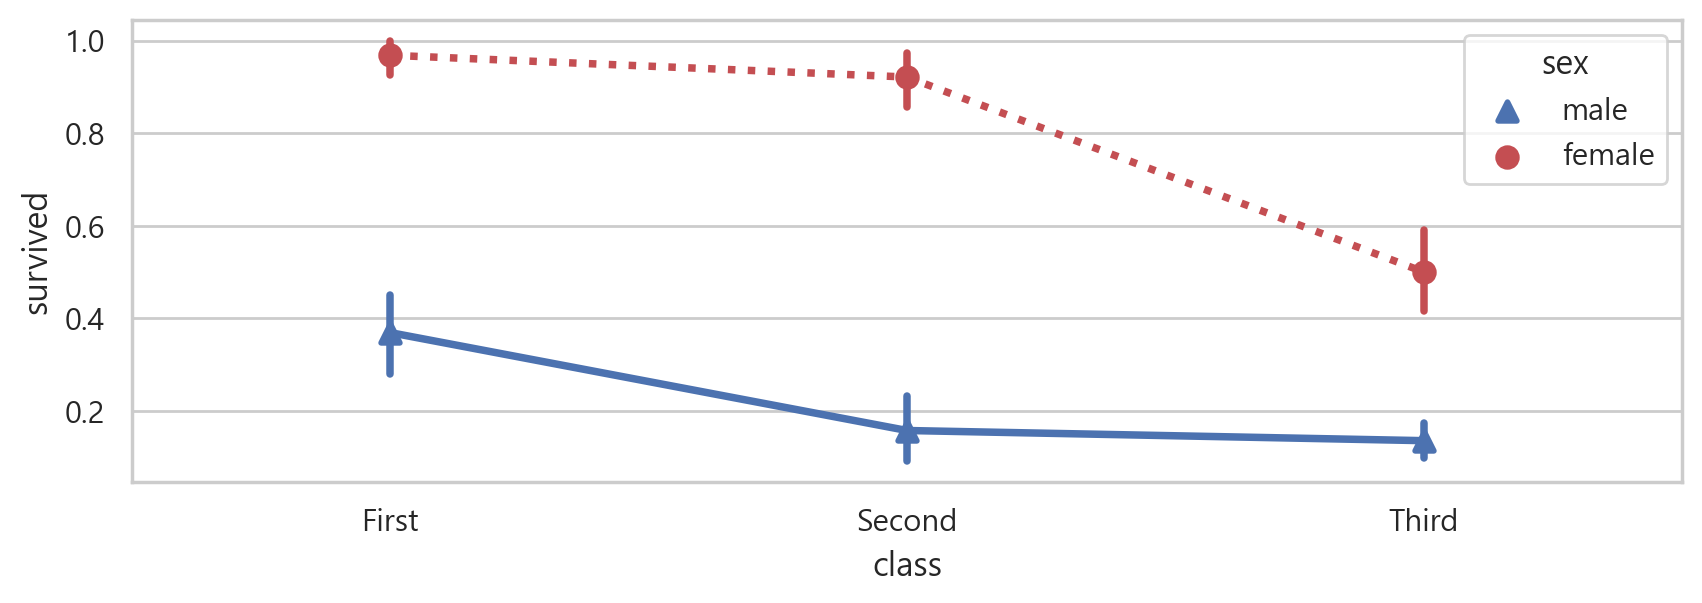

In [82]:
#성별 생존율 hue='class'
sns.pointplot(data=titanic,
           x='class',
           y='survived',
           hue='sex',
           markers=['^','o'],
           linestyles=['-',':'],
           palette={'male':'b', 'female':'r'})
plt.show()

In [86]:
titanic.deck.isna().sum()

688

In [87]:
totallen = len(titanic)
nanlen = titanic.deck.isna().sum()
datalen = totallen - nanlen
print('deck 전체 데이터 갯수:{}, 결측치 갯수 : {}, 데이터갯수 : {}'.format(totallen,
                                                          nanlen,
                                                          datalen)
     )

deck 전체 데이터 갯수:891, 결측치 갯수 : 688, 데이터갯수 : 203


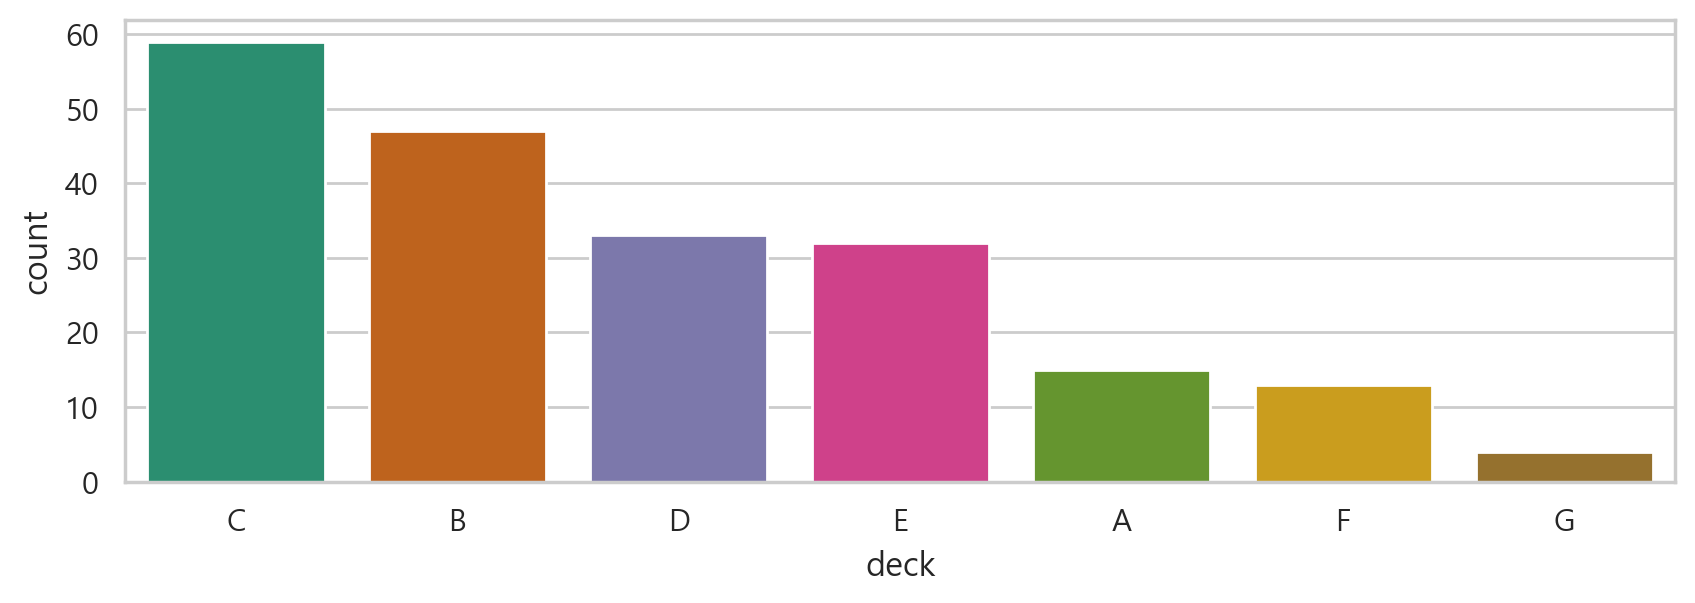

In [96]:
# deck별 갯수를 막대그래프(countplot)
sns.countplot(data=titanic,
              x='deck',
             # order=['C','B','D','E','A','F','G']
              order=deckcnt.index
             )
plt.show()

In [95]:
deckcnt = titanic.deck.value_counts() #범주별 데이터 갯수(정렬 포함)
deckcnt # deckcnt.index가 count가 큰순

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<Axes: xlabel='sex', ylabel='age'>

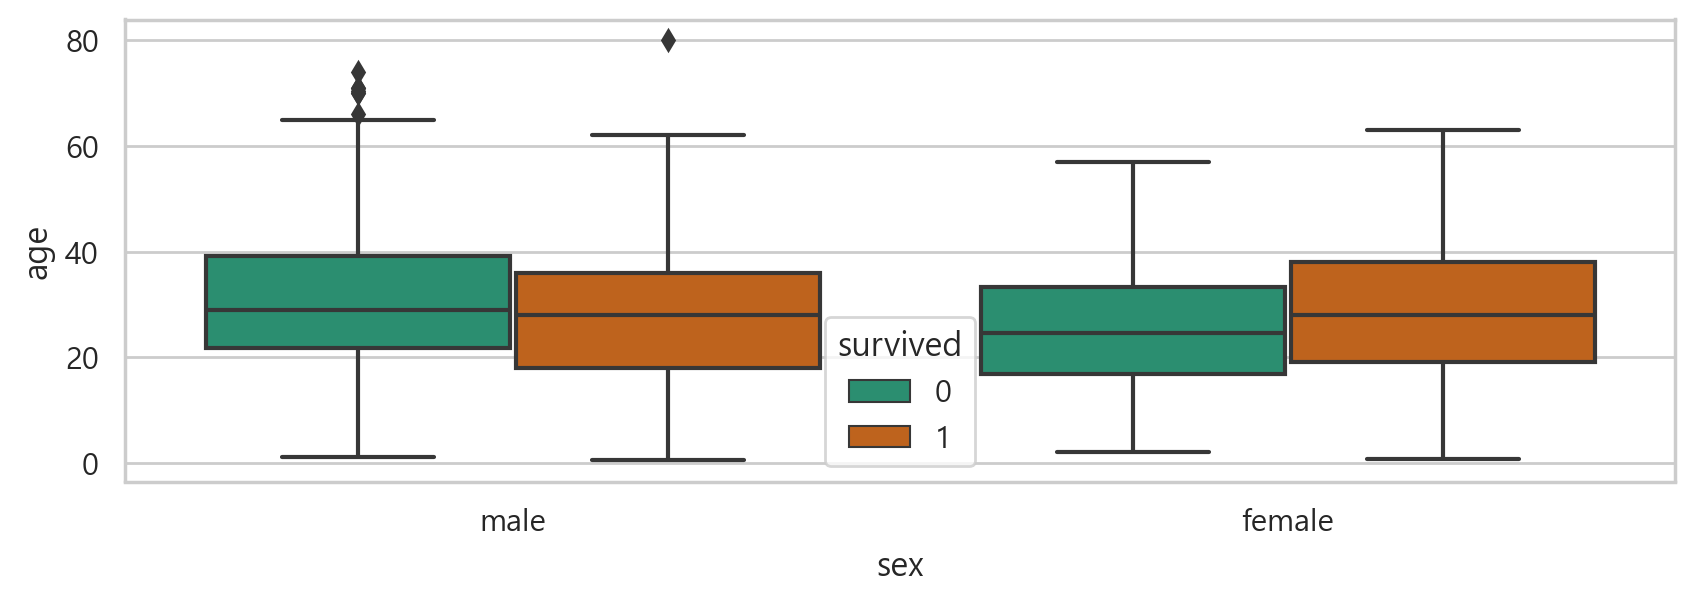

In [98]:
# boxplot
sns.boxplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

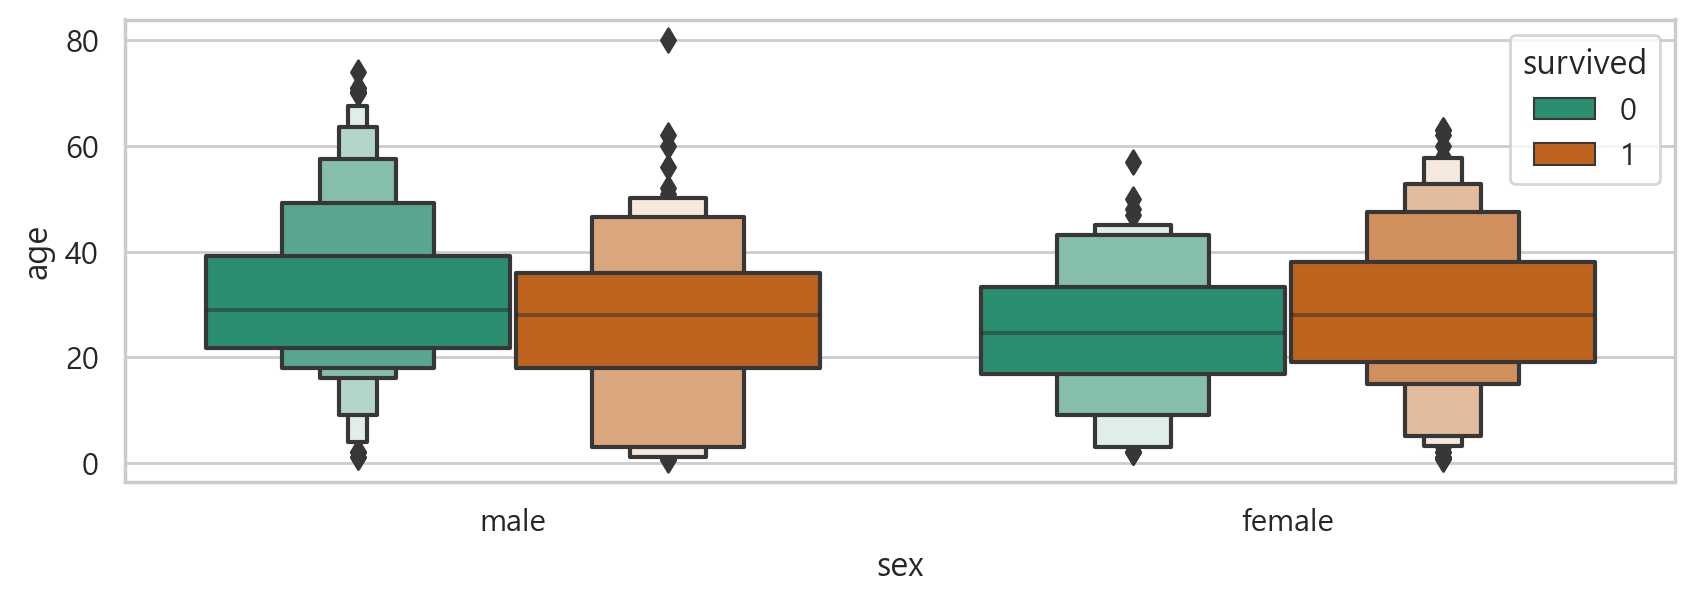

In [100]:
sns.boxenplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='sex', ylabel='age'>

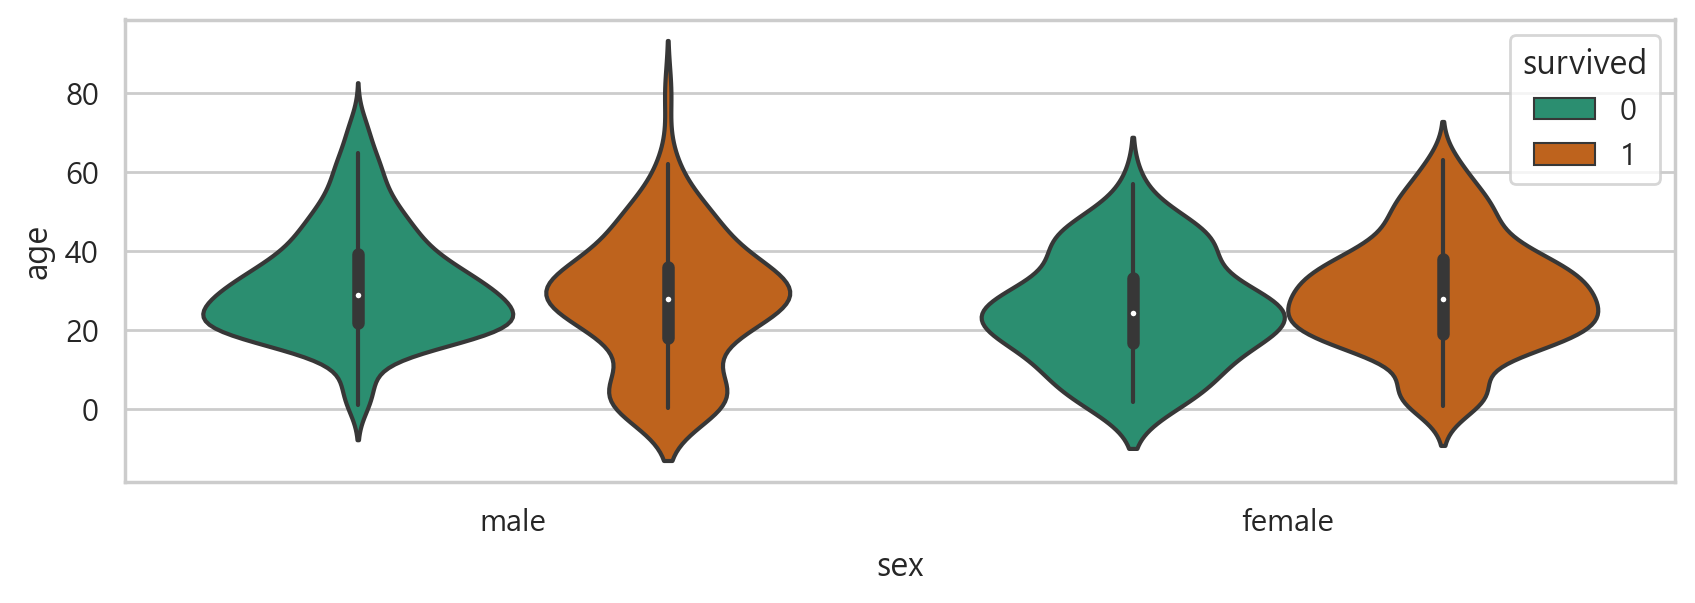

In [99]:
sns.violinplot(data=titanic, x='sex', y='age', hue='survived')

<Axes: xlabel='age', ylabel='sex'>

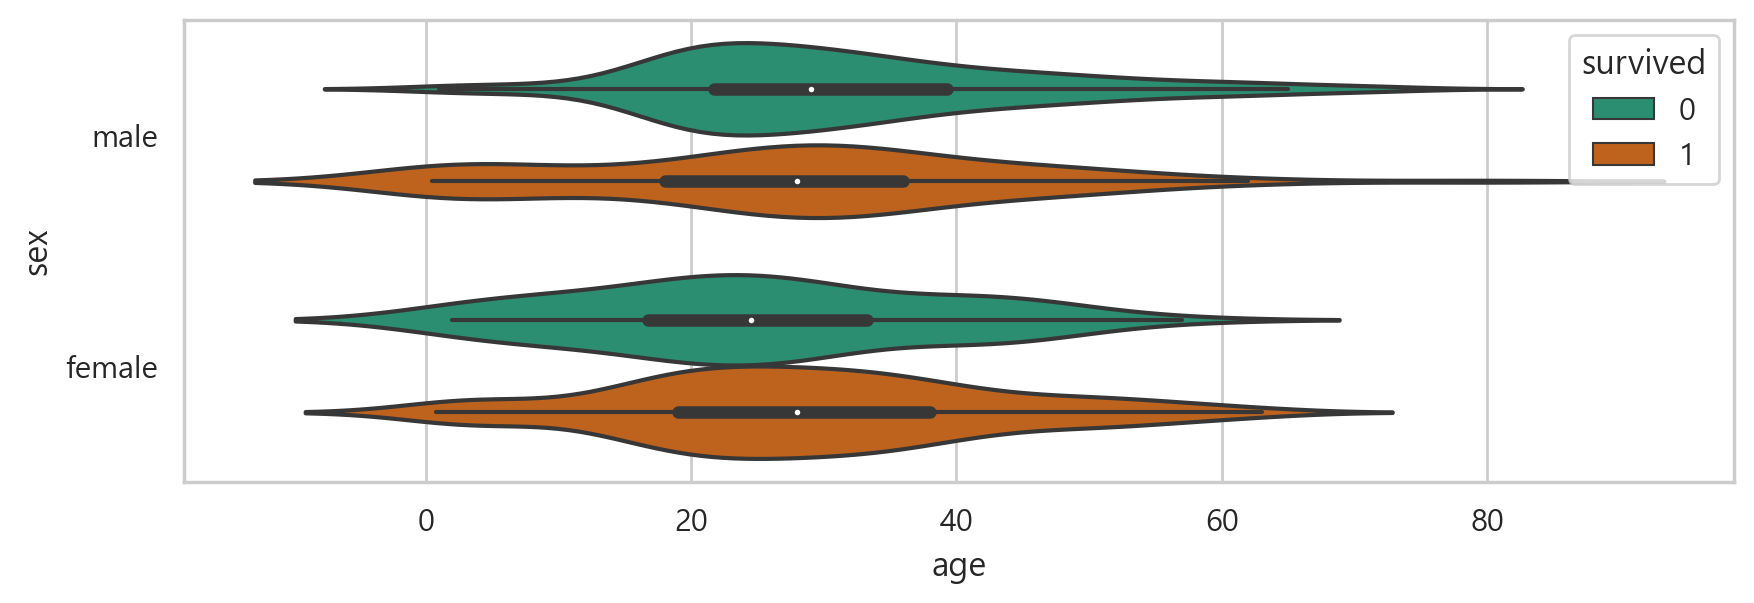

In [101]:
sns.violinplot(data=titanic, y='sex', x='age', hue='survived')

### 3) 쌍관계 그래프
- pairplot : 데이터프레임에 포함됨 모든 수치형 변수 쌍에 대해 산점도(scatter)와 히스토그램

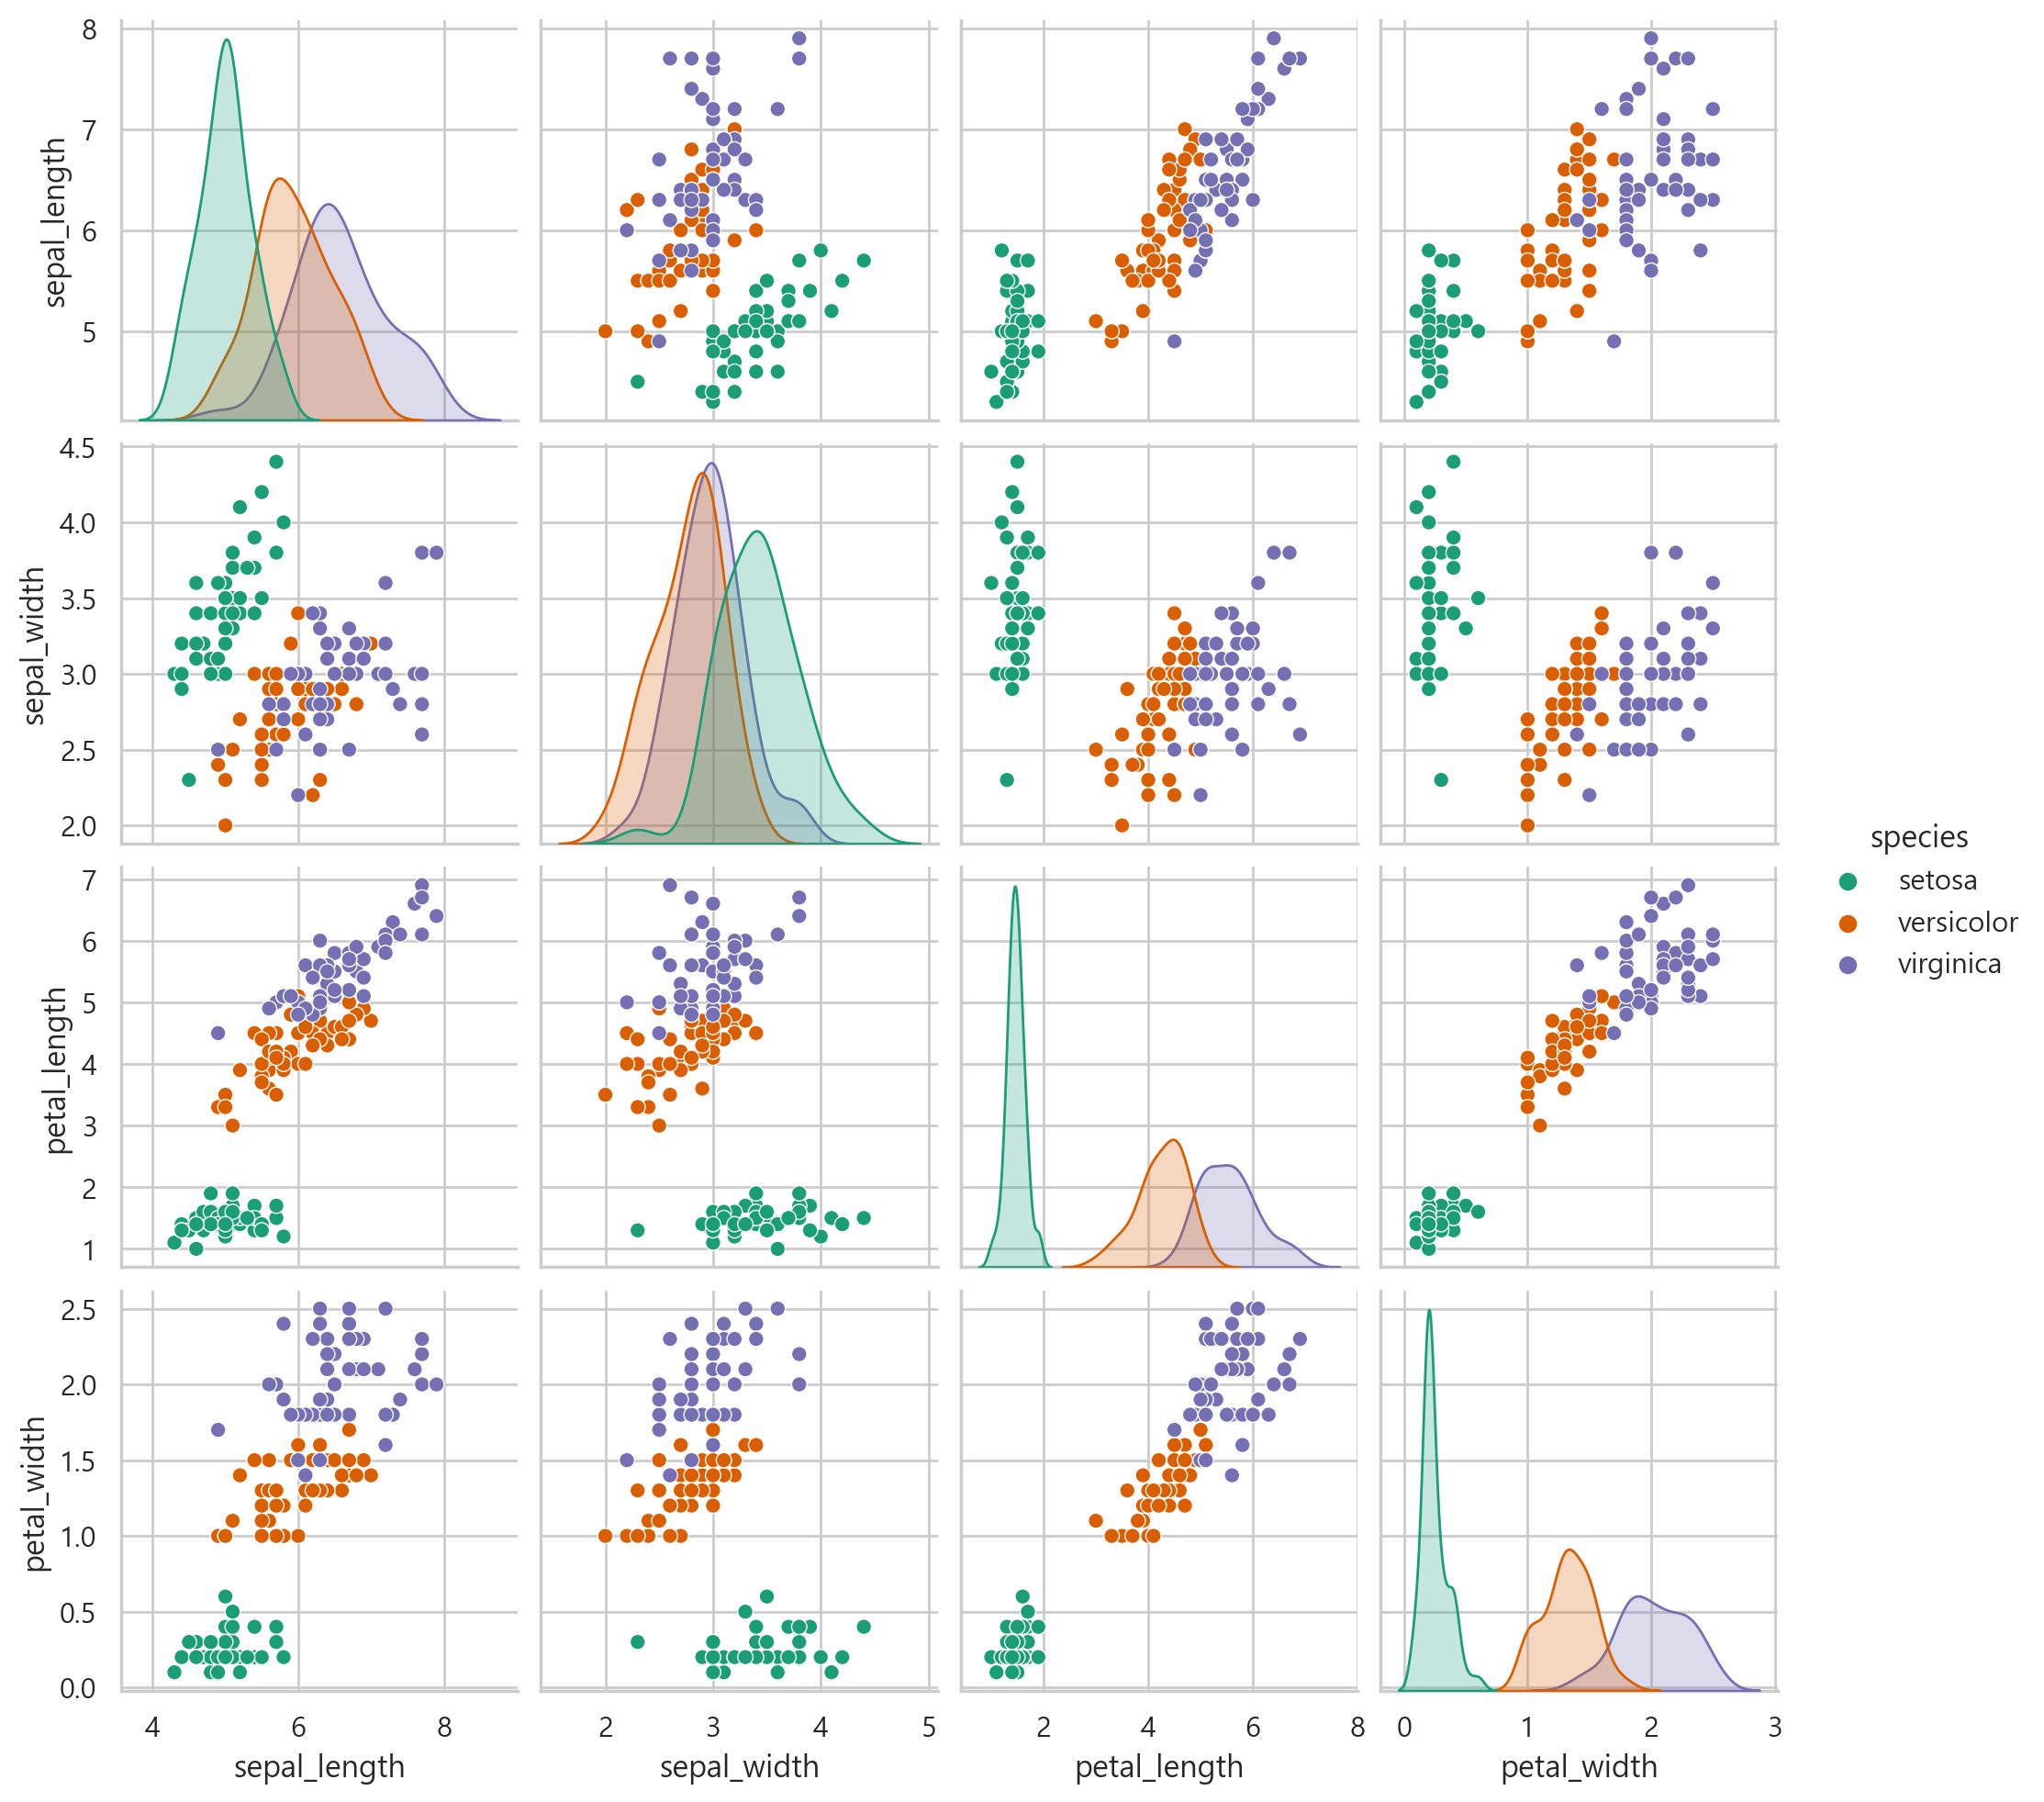

In [109]:
sns.pairplot(data=iris, hue='species')
plt.show()

### 4) 밀도 그래프

In [113]:
import numpy as np
x = np.random.randn(100000) # 평균0, 표준편차 1인 정규분포로 10000개 1차원 배열

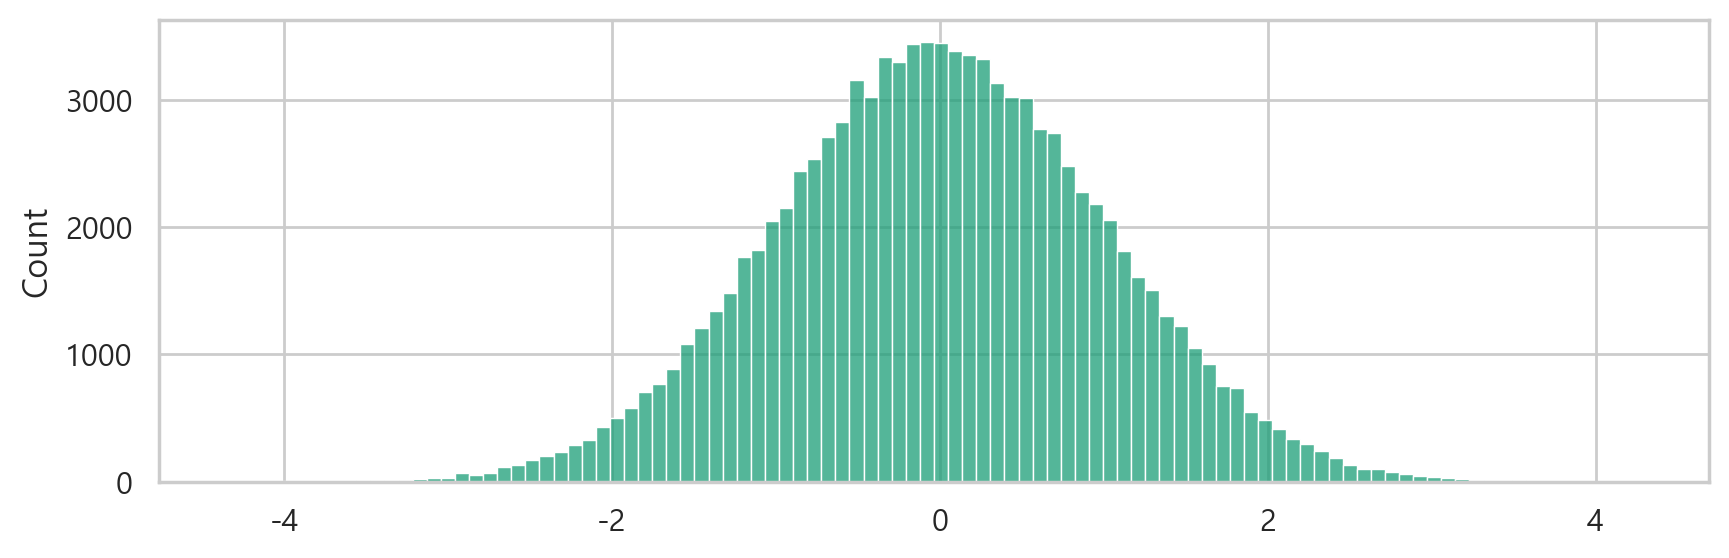

In [119]:
sns.histplot(x, bins=100)
plt.show()

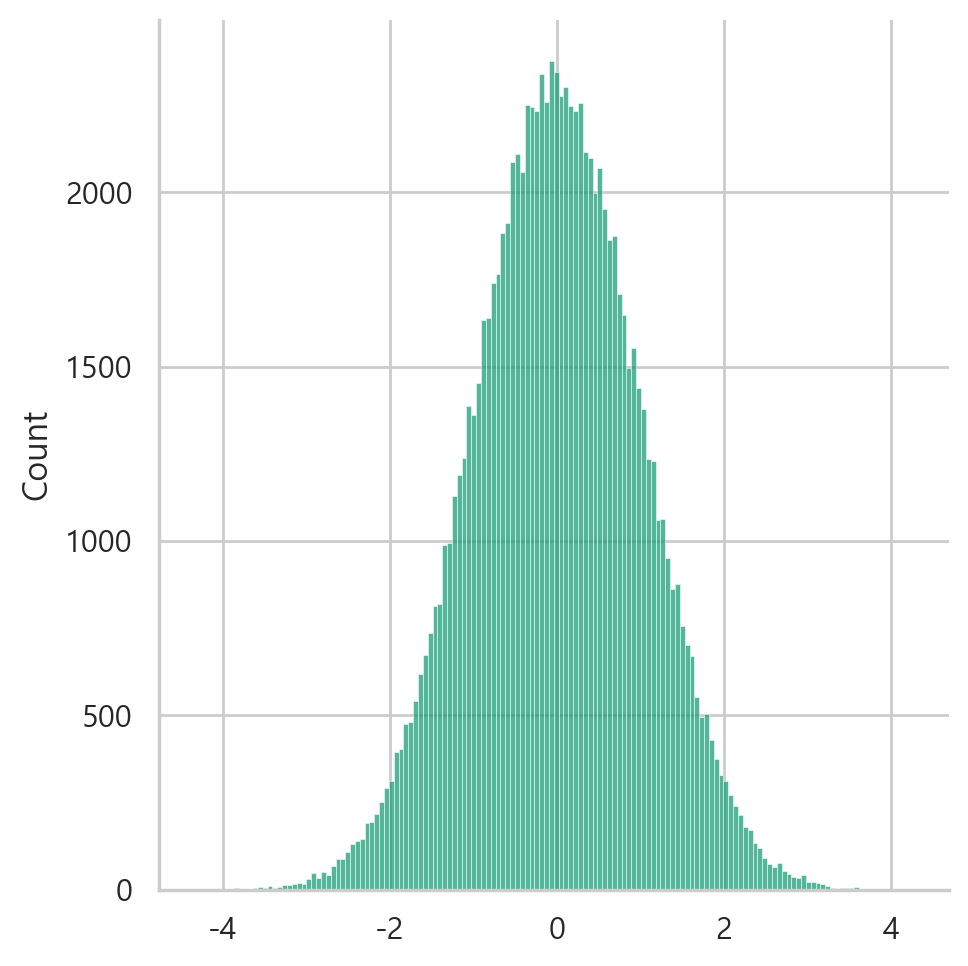

In [120]:
sns.displot(x)

### 5) 회귀 그래프

In [121]:
corr = iris.corr(numeric_only=True)
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


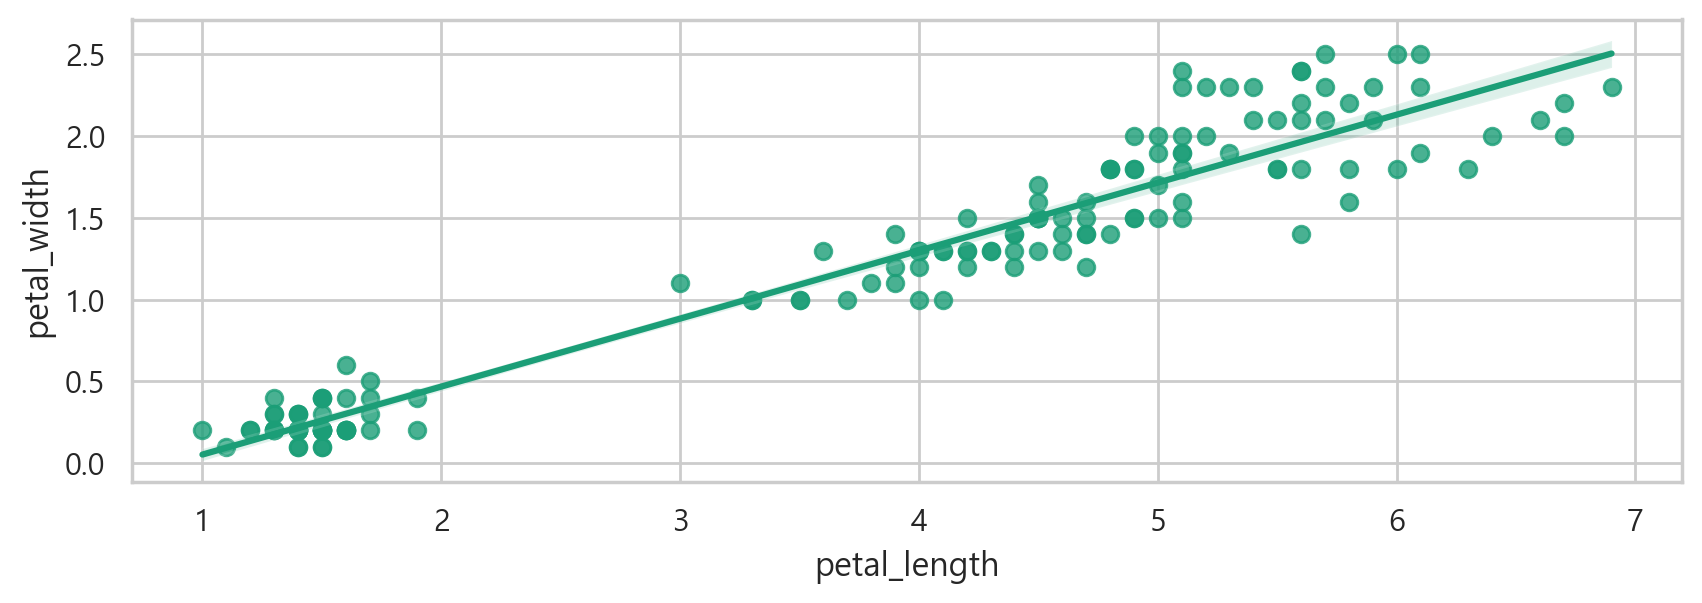

In [122]:
# 회귀그래프 : regplot(hue를 사용할 수 없음.), lmplot(hue를 사용할 수 있음.)
sns.regplot(data=iris, x='petal_length', y='petal_width')
plt.show()

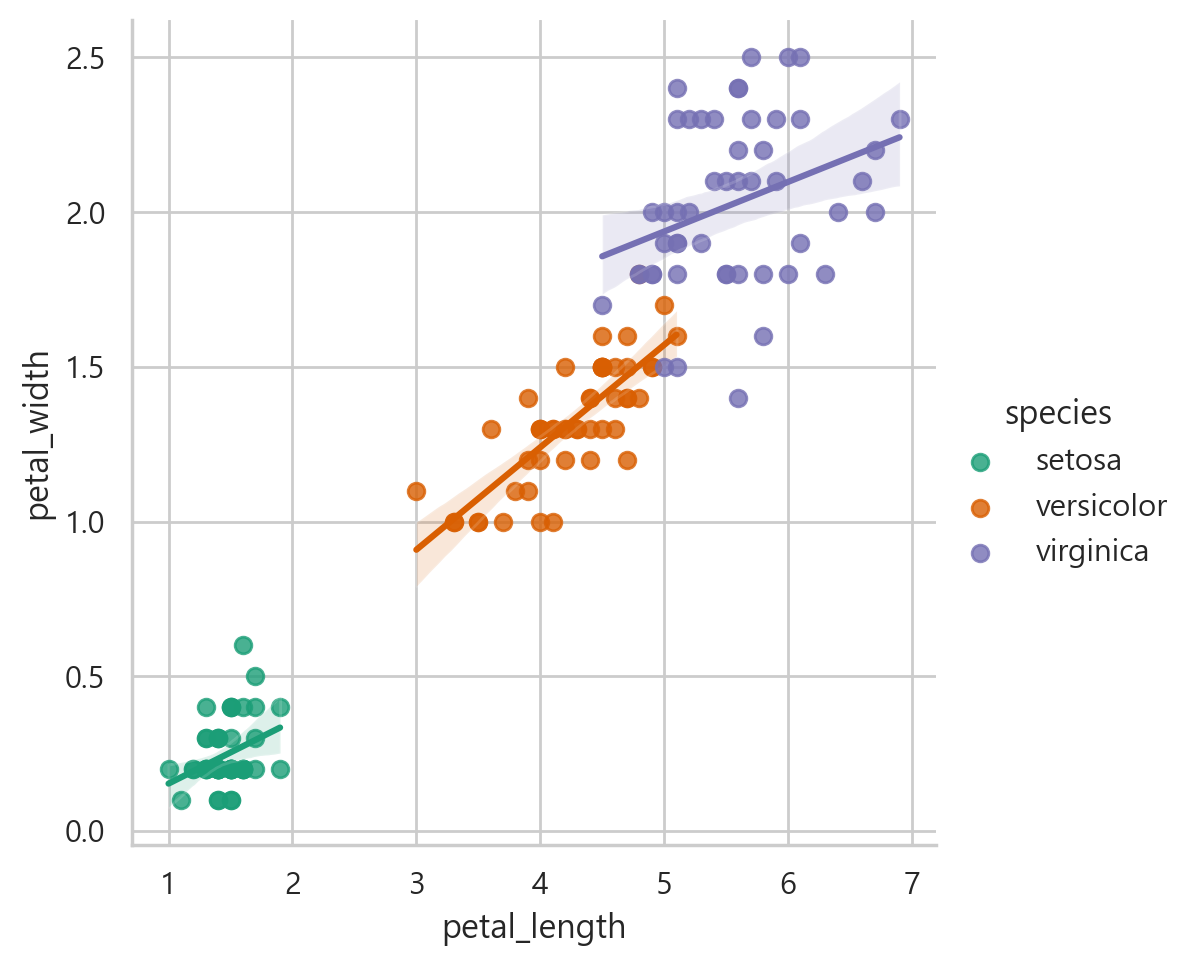

In [125]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', 
          hue='species')
plt.show()

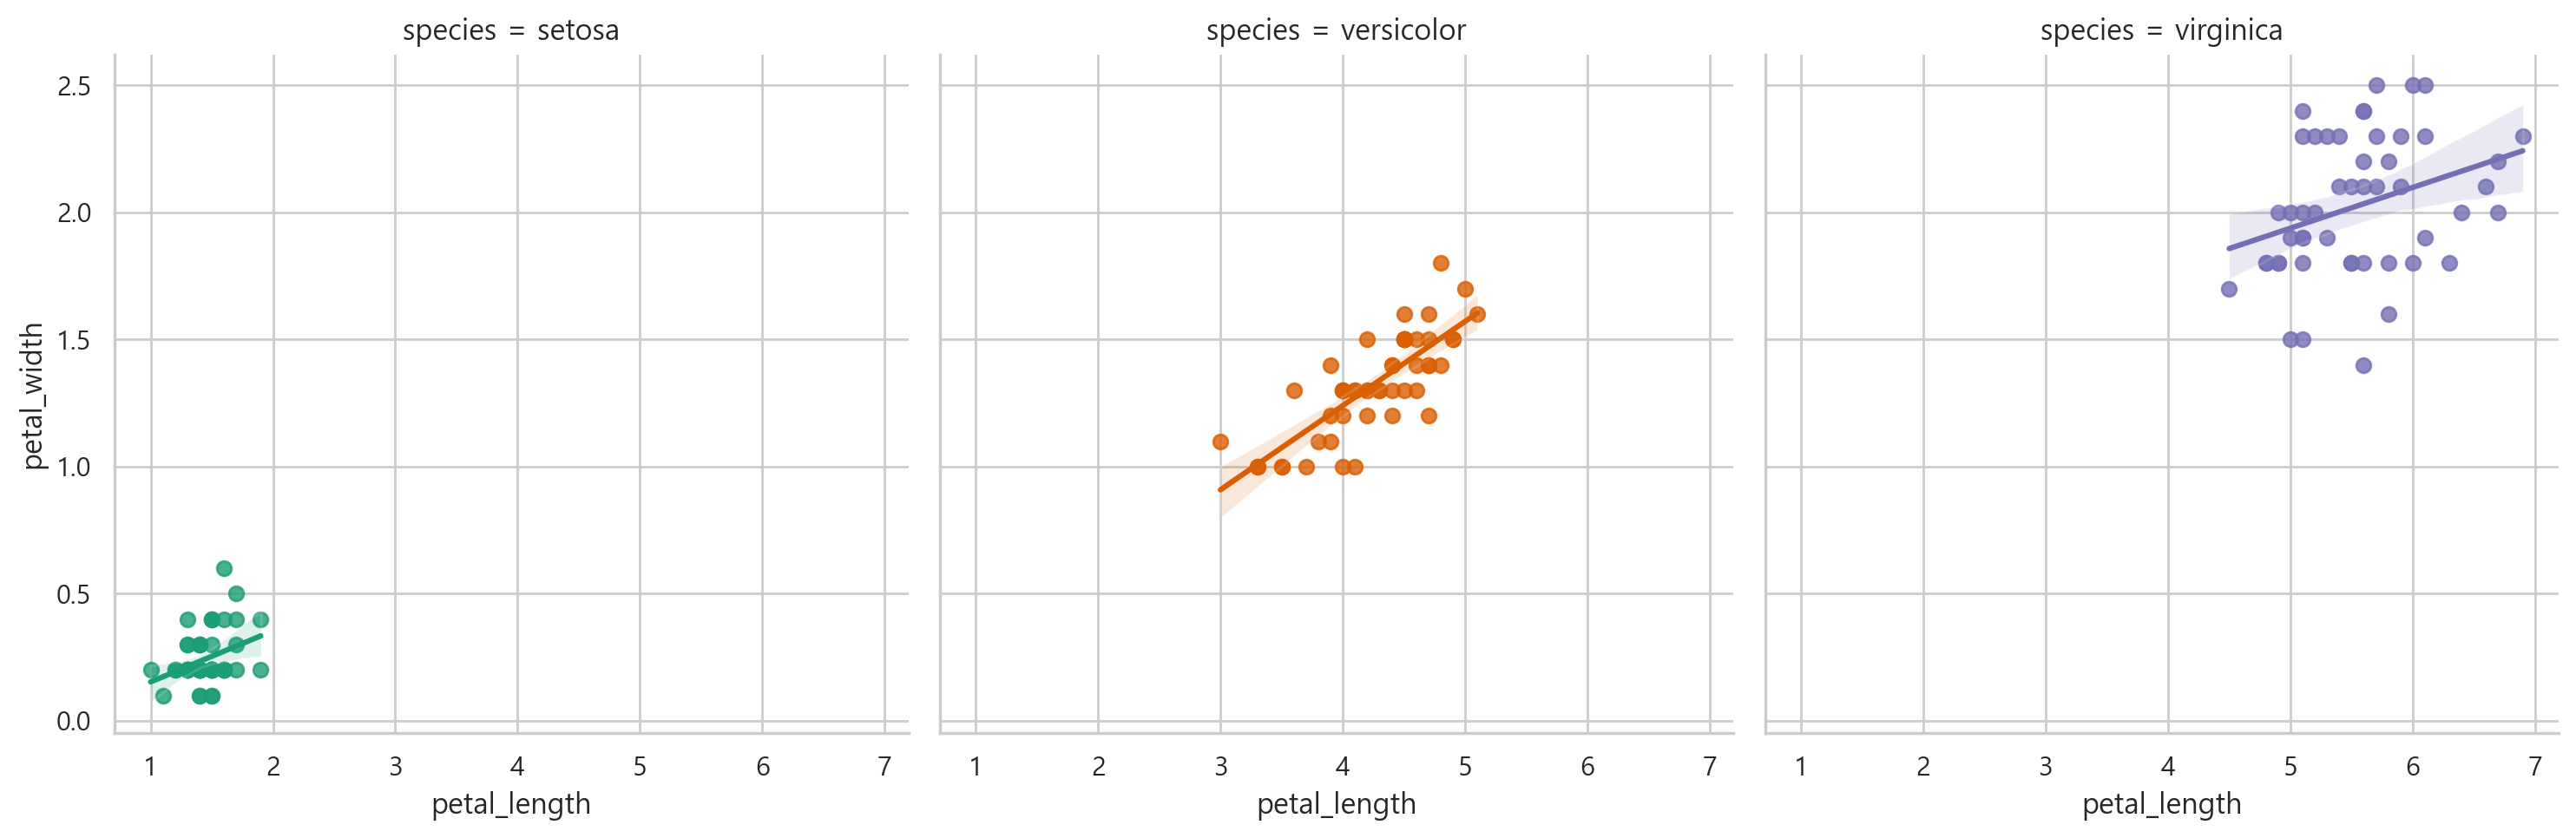

In [126]:
# 종별 회귀그래프
sns.lmplot(data=iris, x='petal_length', y='petal_width', 
          hue='species',
          col='species')
plt.show()

## 2.4 다중그래프를 위한 FacetGrid
https://seaborn.pydata.org/tutorial/axis_grids.html#conditional-small-multiples (교안 84page)

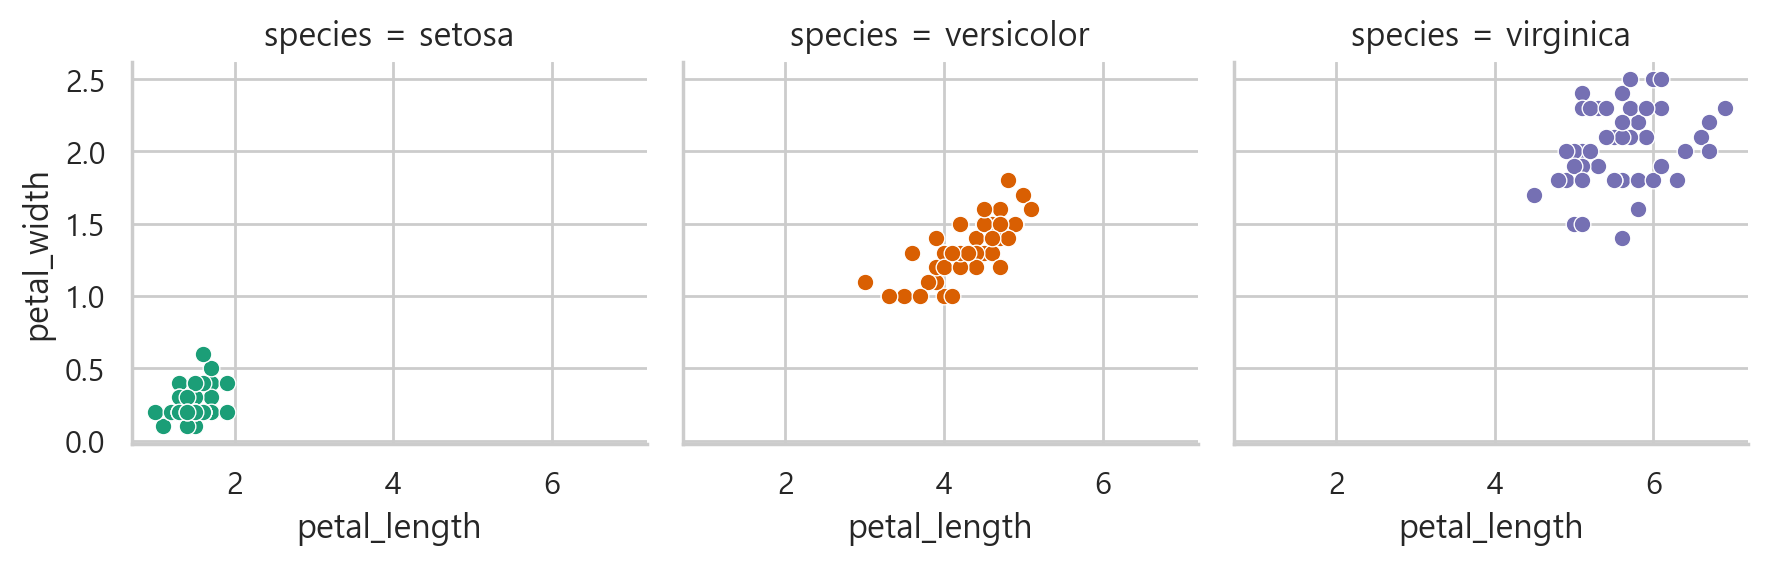

In [127]:
g = sns.FacetGrid(iris, col='species', hue='species')
g.map(sns.scatterplot, 'petal_length', 'petal_width')
plt.show()

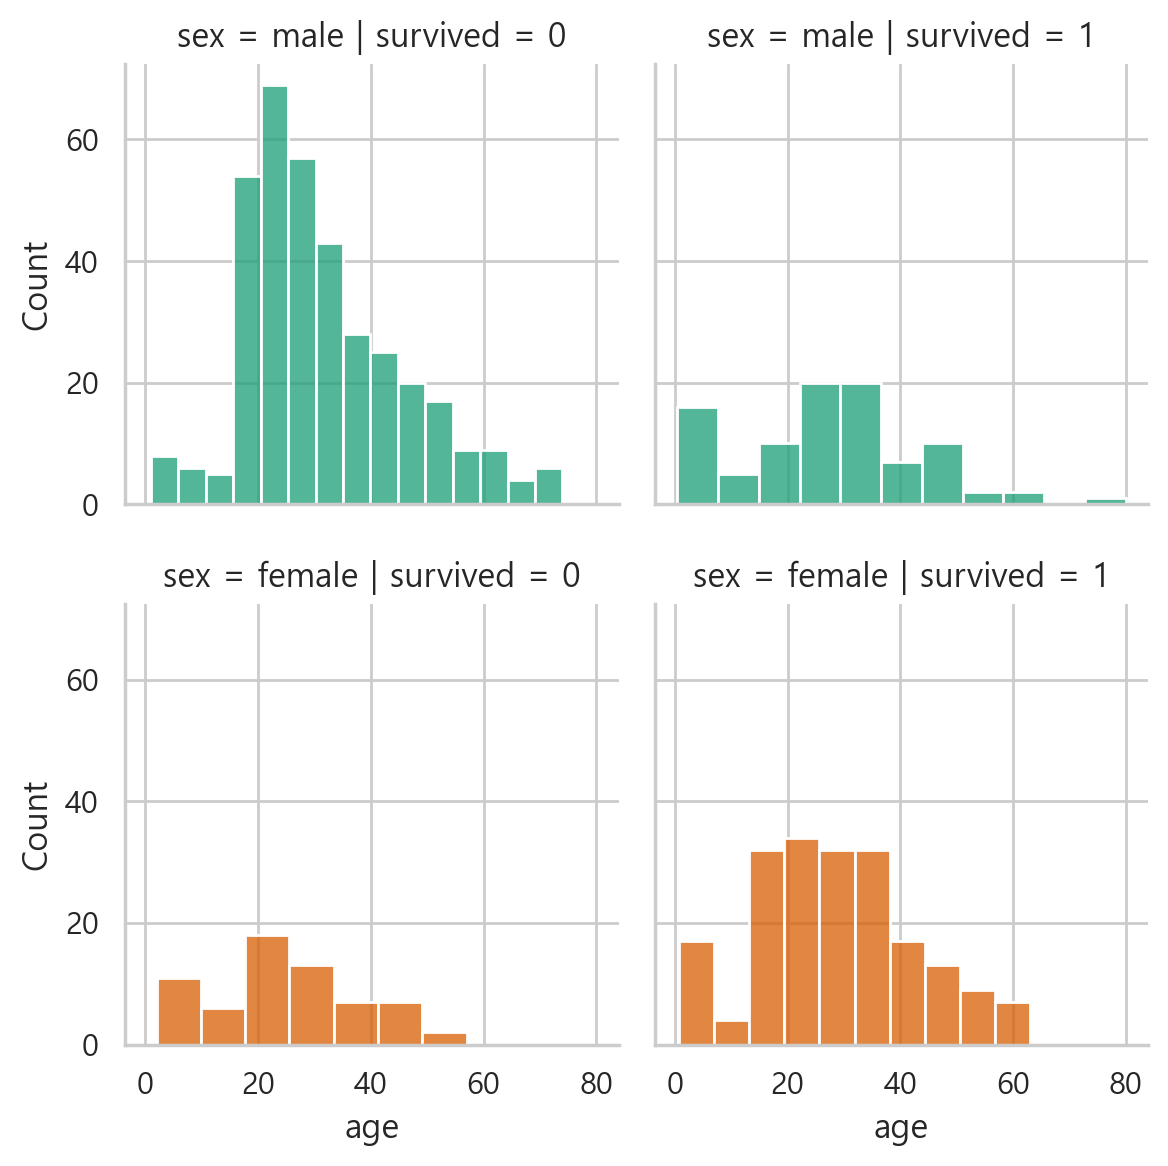

In [129]:
g = sns.FacetGrid(titanic, col='survived', hue='sex', row='sex')
g.map(sns.histplot, 'age')
plt.show()